# 10. Making an MVP that demonstrates the main desired application functions and outputs, based on reviews from the pyhton module

In [1]:
import pandas as pd

from google.colab import drive

# Mounting Google Drive
drive.mount('/content/drive', force_remount=True) # Adding force_remount=True to force the remounting process

df_reviews = pd.read_csv('/content/drive/MyDrive/topic_modelling_supervised_labels.csv')

Mounted at /content/drive


In [ ]:
# Count the total number of rows
total_rows = df_reviews.shape[0]

# Count the number of rows where the values in both columns match
matching_count = df_reviews[df_reviews['sentiment_from_rating'] == df_reviews['sentiment_label_from_review']].shape[0]

# Calculate the percentage of matches
matching_percentage = (matching_count / total_rows) * 100

# Get the rows where the values don't match
mismatch_rows = df_reviews[df_reviews['sentiment_from_rating'] != df_reviews['sentiment_label_from_review']]

# Display the results
print("Percentage of matching entries:", matching_percentage)
# print("Rows where values don't match:")
# print(mismatch_rows)

# Filter for rows where the values in the two columns don't match
# Filter for rows where the values in the two columns don't match
mismatch_rows = df_reviews[df_reviews['sentiment_from_rating'] != df_reviews['sentiment_label_from_review']]

# Show the non-matching rows with relevant columns and indices for inspection
print("Non-matching rows:")
mismatch_rows[['reviews', 'sentiment_from_rating', 'sentiment_label_from_review']]

# Optionally, store this result for later use
# mismatch_rows.to_csv("non_matching_rows.csv", index=True)  # Saves to a CSV file if desired


Percentage of matching entries: 98.4901102219538
Non-matching rows:


,reviews,sentiment_from_rating,sentiment_label_from_review
9,Very very very basic course for someone who do...,negative,positive
65,"This course is too good, experience is similar...",positive,negative
363,Great introduction and the instructor is very ...,negative,positive
368,Please update this course and create programmi...,positive,negative
504,Throughout the course didn't feel bore at all ...,positive,negative
...,...,...,...
39475,Was shocked by Math! You have to be perfect at...,negative,positive
39492,This wasn't an easy course. It probably took ...,positive,negative
39571,"Yeah, the robot voice is annoying. There need...",positive,negative
39608,the way doctor explains the stuff is not inter...,positive,negative


Removing the non-matching rows

In [ ]:
# Count the total number of rows
total_rows = df_reviews.shape[0]

# Count the number of rows where the values in both columns match
matching_count = df_reviews[df_reviews['sentiment_from_rating'] == df_reviews['sentiment_label_from_review']].shape[0]

# Calculate the percentage of matches
matching_percentage = (matching_count / total_rows) * 100

# Display the percentage of matching entries
print("Percentage of matching entries:", matching_percentage)

# Filter to keep only rows where the two columns match
df_reviews = df_reviews[df_reviews['sentiment_from_rating'] == df_reviews['sentiment_label_from_review']]

# Display the filtered DataFrame
print("Filtered DataFrame:")
print(df_reviews)


Percentage of matching entries: 98.4901102219538
Filtered DataFrame:
                                                 reviews date_reviews  rating  \
0      Andrew Ng has provided a fantastic resource fo...   2017-09-12       5   
1      Peer graded assingments take a lot of time bec...   2020-06-14       4   
2      This course was the first actual course for Pr...   2019-01-31       5   
3      The best course to start with if you are enter...   2017-08-20       5   
4      I wanted to learn more about Functional Progra...   2020-07-12       4   
...                                                  ...          ...     ...   
39733  This course is one of the best courses that sh...   2019-02-12       4   
39734  The details about Objects, References and Alia...   2019-08-08       4   
39735  This course gives very basic information about...   2016-02-19       4   
39736                   Awesome courseDr. Chuck is great   2019-02-03       4   
39737  Clear and precise teaching method

In [ ]:
# Step 1: Change 'admiration' to 'enjoyment/happiness' in the 'emotion_label' column
df_reviews["emotion_label"] = df_reviews["emotion_label"].replace("admiration", "enjoyment/happiness")

# Step 2: Remove rows where 'neutral' appears in any of the specified columns
df_reviews = df_reviews[~df_reviews[["emotion_label", "sentiment_from_rating", "sentiment_label_from_review"]].isin(["neutral"]).any(axis=1)]


In [ ]:
df_reviews

,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,LDA_Topic,BART_Topic
0,Andrew Ng has provided a fantastic resource fo...,2017-09-12,5,machine-learning,2017-09,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,['Career Relevance and Application'],"['Course Material', 'Instructor', 'Lectures']"
2,This course was the first actual course for Pr...,2019-01-31,5,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,['Workload and Difficulty'],"['Instructor', 'Course Material', 'Lectures']"
3,The best course to start with if you are enter...,2017-08-20,5,machine-learning,2017-08,Computer Science,Machine Learning,Stanford University,positive,approval,positive,['Class Participation and Engagement'],"['Course Material', 'Instructor', 'Lectures']"
4,I wanted to learn more about Functional Progra...,2020-07-12,4,programming-languages,2020-07,Computer Science,"Programming Languages, Part A",University of Washington,positive,approval,positive,['Assignments'],"['Course Material', 'Instructor', 'Workload']"
5,"Thoroughly enjoyed the course. Yes, despite my...",2018-03-14,5,machine-learning,2018-03,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,['Exams'],"['Course Material', 'Instructor', 'Lectures']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39733,This course is one of the best courses that sh...,2019-02-12,4,python-data-visualization,2019-02,Computer Science,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,positive,enjoyment/happiness,positive,"['Online Resources', 'Assignments', 'Class Env...","['Course Material', 'Grading', 'Instructor']"
39734,"The details about Objects, References and Alia...",2019-08-08,4,python-basics,2019-08,Computer Science,Python Basics,University of Michigan,positive,enjoyment/happiness,positive,"['Career Relevance and Application', 'Online R...","['Course Material', 'Instructor', 'Lectures']"
39735,This course gives very basic information about...,2016-02-19,4,python-databases,2016-02,Computer Science,Using Databases with Python,University of Michigan,positive,enjoyment/happiness,positive,['Learning Outcomes and Skills'],"['Course Material', 'Lectures', 'Instructor']"
39736,Awesome courseDr. Chuck is great,2019-02-03,4,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,['Lectures'],"['Course Material', 'Instructor', 'Lectures']"


removing the last item from the topic list

In [ ]:
import ast  # For safely evaluating string representations of lists

# Convert strings to actual lists
df_reviews['BART_Topic'] = df_reviews['BART_Topic'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Function to remove the last topic
def remove_last_topic(topics):
    if isinstance(topics, list) and topics:  # Check if it's a list and not empty
        return topics[:-1]  # Remove the last item
    return topics  # Return unchanged if it's not a list

# Apply the function to remove the last topic
df_reviews['BART_Topic'] = df_reviews['BART_Topic'].apply(remove_last_topic)

# Display the updated DataFrame
df_reviews


,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,LDA_Topic,BART_Topic
0,Andrew Ng has provided a fantastic resource fo...,2017-09-12,5,machine-learning,2017-09,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,['Career Relevance and Application'],"[Course Material, Instructor]"
2,This course was the first actual course for Pr...,2019-01-31,5,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,['Workload and Difficulty'],"[Instructor, Course Material]"
3,The best course to start with if you are enter...,2017-08-20,5,machine-learning,2017-08,Computer Science,Machine Learning,Stanford University,positive,approval,positive,['Class Participation and Engagement'],"[Course Material, Instructor]"
4,I wanted to learn more about Functional Progra...,2020-07-12,4,programming-languages,2020-07,Computer Science,"Programming Languages, Part A",University of Washington,positive,approval,positive,['Assignments'],"[Course Material, Instructor]"
5,"Thoroughly enjoyed the course. Yes, despite my...",2018-03-14,5,machine-learning,2018-03,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,['Exams'],"[Course Material, Instructor]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39733,This course is one of the best courses that sh...,2019-02-12,4,python-data-visualization,2019-02,Computer Science,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,positive,enjoyment/happiness,positive,"['Online Resources', 'Assignments', 'Class Env...","[Course Material, Grading]"
39734,"The details about Objects, References and Alia...",2019-08-08,4,python-basics,2019-08,Computer Science,Python Basics,University of Michigan,positive,enjoyment/happiness,positive,"['Career Relevance and Application', 'Online R...","[Course Material, Instructor]"
39735,This course gives very basic information about...,2016-02-19,4,python-databases,2016-02,Computer Science,Using Databases with Python,University of Michigan,positive,enjoyment/happiness,positive,['Learning Outcomes and Skills'],"[Course Material, Lectures]"
39736,Awesome courseDr. Chuck is great,2019-02-03,4,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,['Lectures'],"[Course Material, Instructor]"


extracting only python reviews

In [ ]:
python_subset = df_reviews[df_reviews["course_id"] == "python"]

verifying the number of rows

In [ ]:
python_subset

,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,LDA_Topic,BART_Topic
2,This course was the first actual course for Pr...,2019-01-31,5,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,['Workload and Difficulty'],"[Instructor, Course Material]"
7,It is very useful. The clarity of the video i...,2020-05-05,5,python,2020-05,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,['Lectures'],"[Course Material, Instructor]"
17,A very nicely conducted course on Python progr...,2018-01-30,5,python,2018-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,gratitude,positive,['Course Material'],"[Instructor, Course Material]"
19,Awesome intro. . wish the lectures weren't so ...,2018-03-09,4,python,2018-03,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,['Class Environment and Culture'],"[Lectures, Course Material]"
21,The course is exceptionally well-crafted for s...,2020-04-17,5,python,2020-04,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,['Workload and Difficulty'],"[Lectures, Instructor]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39726,I loved the instructor teaching style and I hi...,2017-09-09,5,python,2017-09,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,gratitude,positive,['Facilities and Equipment'],"[Course Material, Assignments]"
39727,"Great course, incredible teacher. I recommend ...",2016-06-13,5,python,2016-06,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"['Online Resources', 'Lectures', 'Instructor/P...","[Course Material, Instructor]"
39728,Simple and easy to understand.,2020-06-19,4,python,2020-06,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,approval,positive,['Facilities and Equipment'],"[Course Material, Instructor]"
39736,Awesome courseDr. Chuck is great,2019-02-03,4,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,['Lectures'],"[Course Material, Instructor]"


In [ ]:
python_subset[["reviews", "LDA_Topic", "BART_Topic"]].iloc[:100]

,reviews,LDA_Topic,BART_Topic
2,This course was the first actual course for Pr...,['Workload and Difficulty'],"[Instructor, Course Material]"
7,It is very useful. The clarity of the video i...,['Lectures'],"[Course Material, Instructor]"
17,A very nicely conducted course on Python progr...,['Course Material'],"[Instructor, Course Material]"
19,Awesome intro. . wish the lectures weren't so ...,['Class Environment and Culture'],"[Lectures, Course Material]"
21,The course is exceptionally well-crafted for s...,['Workload and Difficulty'],"[Lectures, Instructor]"
...,...,...,...
360,Its really great experience of your interactiv...,['Instructor/Professor'],"[Instructor, Lectures]"
361,I knew a little bit of python before but have ...,['Learning Outcomes and Skills'],"[Course Material, Instructor]"
364,This is my first successful COURSERA course. T...,['Course Structure and Organization'],"[Instructor, Workload]"
365,Really useful to all those who are just starti...,['Course Material'],"[Course Material, Instructor]"


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/df_topics_unsupervised_labels_updated.csv")

In [ ]:
df2.columns

Index(['Unnamed: 0', 'reviews', 'date_reviews', 'rating', 'course_id', 'month',
       'departments', 'name', 'institution', 'sentiment_from_rating',
       'emotion_label', 'sentiment_label', 'sentiment_label_from_review',
       'processed_reviews', 'LDA_topic_3', 'LDA_topic_4', 'LDA_topic_5'],
      dtype='object')

In [ ]:
df_reviews.columns

Index(['reviews', 'date_reviews', 'rating', 'course_id', 'month',
       'departments', 'name', 'institution', 'sentiment_from_rating',
       'emotion_label', 'sentiment_label_from_review', 'LDA_Topic',
       'BART_Topic'],
      dtype='object')

In [ ]:
# Select only the columns of interest from df2
df2_subset = df2[['reviews', 'LDA_topic_3', 'LDA_topic_4', 'LDA_topic_5']]

# Merge df1 with the selected columns from df2 on 'reviews'
merge_df = pd.merge(df_reviews, df2_subset, on='reviews', how='inner')

# Display the resulting DataFrame
merge_df


,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,BART_Topic,LDA_topic_3_x,LDA_topic_4_x,topic_summary,primary_emotion_label,LDA_topic_3_y,LDA_topic_4_y,LDA_topic_5
0,Andrew Ng has provided a fantastic resource fo...,2017-09-12,5.0,machine-learning,2017-09,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",LABEL_1,Learning Outcomes,Learning Outcomes,Learning Outcomes
1,This course was the first actual course for Pr...,2019-01-31,5.0,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Instructor, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",LABEL_1,Utility and Usefulness,Course Material and Understanding,Course Structure and Organisation
2,The best course to start with if you are enter...,2017-08-20,5.0,machine-learning,2017-08,Computer Science,Machine Learning,Stanford University,positive,approval,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",LABEL_1,Learning Outcomes,Learning Outcomes,Learning Outcomes
3,I wanted to learn more about Functional Progra...,2020-07-12,4.0,programming-languages,2020-07,Computer Science,"Programming Languages, Part A",University of Washington,positive,approval,positive,"[Course Material, Instructor]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Instructor]",LABEL_1,Course Material,Course Material and Understanding,Course Structure and Organisation
4,"Thoroughly enjoyed the course. Yes, despite my...",2018-03-14,5.0,machine-learning,2018-03,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Learning Outcomes,"[Utility and Usefulness, Learning Outcomes, Co...",LABEL_1,Utility and Usefulness,Learning Outcomes,Course Material
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36883,This course is one of the best courses that sh...,2019-02-12,4.0,python-data-visualization,2019-02,Computer Science,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Grading]",Utility and Usefulness,Learning Outcomes,"[Utility and Usefulness, Learning Outcomes, Co...",LABEL_1,Utility and Usefulness,Learning Outcomes,Course Engagement and Course Feelings(Sentiment)
36884,"The details about Objects, References and Alia...",2019-08-08,4.0,python-basics,2019-08,Computer Science,Python Basics,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Course Material,Course Engagement and Course Feelings(Sentiment),[Course Engagement and Course Feelings(Sentime...,LABEL_0,Course Material,Course Engagement and Course Feelings(Sentiment),Course Material
36885,This course gives very basic information about...,2016-02-19,4.0,python-databases,2016-02,Computer Science,Using Databases with Python,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Lectures]",Course Material,Course Structure,"[Course Structure, Course Material, Lectures]",LABEL_0,Course Material,Course Structure,Course Material
36886,Awesome courseDr. Chuck is great,2019-02-03,4.0,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",LABEL_0,Utility and Usefulness,Course Material and Understanding,Course Engagement and Course Feelings(Sentiment)


Removing duplicates

In [ ]:
merge_df = merge_df.drop_duplicates(subset=['reviews'])
merge_df

,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,BART_Topic,LDA_topic_3_x,LDA_topic_4_x,topic_summary,primary_emotion_label,LDA_topic_3_y,LDA_topic_4_y,LDA_topic_5
0,Andrew Ng has provided a fantastic resource fo...,2017-09-12,5.0,machine-learning,2017-09,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",LABEL_1,Learning Outcomes,Learning Outcomes,Learning Outcomes
1,This course was the first actual course for Pr...,2019-01-31,5.0,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Instructor, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",LABEL_1,Utility and Usefulness,Course Material and Understanding,Course Structure and Organisation
2,The best course to start with if you are enter...,2017-08-20,5.0,machine-learning,2017-08,Computer Science,Machine Learning,Stanford University,positive,approval,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",LABEL_1,Learning Outcomes,Learning Outcomes,Learning Outcomes
3,I wanted to learn more about Functional Progra...,2020-07-12,4.0,programming-languages,2020-07,Computer Science,"Programming Languages, Part A",University of Washington,positive,approval,positive,"[Course Material, Instructor]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Instructor]",LABEL_1,Course Material,Course Material and Understanding,Course Structure and Organisation
4,"Thoroughly enjoyed the course. Yes, despite my...",2018-03-14,5.0,machine-learning,2018-03,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Learning Outcomes,"[Utility and Usefulness, Learning Outcomes, Co...",LABEL_1,Utility and Usefulness,Learning Outcomes,Course Material
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36883,This course is one of the best courses that sh...,2019-02-12,4.0,python-data-visualization,2019-02,Computer Science,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Grading]",Utility and Usefulness,Learning Outcomes,"[Utility and Usefulness, Learning Outcomes, Co...",LABEL_1,Utility and Usefulness,Learning Outcomes,Course Engagement and Course Feelings(Sentiment)
36884,"The details about Objects, References and Alia...",2019-08-08,4.0,python-basics,2019-08,Computer Science,Python Basics,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Course Material,Course Engagement and Course Feelings(Sentiment),[Course Engagement and Course Feelings(Sentime...,LABEL_0,Course Material,Course Engagement and Course Feelings(Sentiment),Course Material
36885,This course gives very basic information about...,2016-02-19,4.0,python-databases,2016-02,Computer Science,Using Databases with Python,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Lectures]",Course Material,Course Structure,"[Course Structure, Course Material, Lectures]",LABEL_0,Course Material,Course Structure,Course Material
36886,Awesome courseDr. Chuck is great,2019-02-03,4.0,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",LABEL_0,Utility and Usefulness,Course Material and Understanding,Course Engagement and Course Feelings(Sentiment)


dropping supervised LDA and LDA unsupervised with 5 topics, since performance is poorer compared to remaining

In [ ]:
merge_df.drop(columns=["LDA_topic_5"], inplace=True)

<ipython-input-37-4bd6e85ebe09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df.drop(columns=["LDA_topic_5"], inplace=True)


In [ ]:
merge_df

,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,BART_Topic,LDA_topic_3_x,LDA_topic_4_x,topic_summary,primary_emotion_label,LDA_topic_3_y,LDA_topic_4_y
0,Andrew Ng has provided a fantastic resource fo...,2017-09-12,5.0,machine-learning,2017-09,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",LABEL_1,Learning Outcomes,Learning Outcomes
1,This course was the first actual course for Pr...,2019-01-31,5.0,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Instructor, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",LABEL_1,Utility and Usefulness,Course Material and Understanding
2,The best course to start with if you are enter...,2017-08-20,5.0,machine-learning,2017-08,Computer Science,Machine Learning,Stanford University,positive,approval,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",LABEL_1,Learning Outcomes,Learning Outcomes
3,I wanted to learn more about Functional Progra...,2020-07-12,4.0,programming-languages,2020-07,Computer Science,"Programming Languages, Part A",University of Washington,positive,approval,positive,"[Course Material, Instructor]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Instructor]",LABEL_1,Course Material,Course Material and Understanding
4,"Thoroughly enjoyed the course. Yes, despite my...",2018-03-14,5.0,machine-learning,2018-03,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Learning Outcomes,"[Utility and Usefulness, Learning Outcomes, Co...",LABEL_1,Utility and Usefulness,Learning Outcomes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36883,This course is one of the best courses that sh...,2019-02-12,4.0,python-data-visualization,2019-02,Computer Science,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Grading]",Utility and Usefulness,Learning Outcomes,"[Utility and Usefulness, Learning Outcomes, Co...",LABEL_1,Utility and Usefulness,Learning Outcomes
36884,"The details about Objects, References and Alia...",2019-08-08,4.0,python-basics,2019-08,Computer Science,Python Basics,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Course Material,Course Engagement and Course Feelings(Sentiment),[Course Engagement and Course Feelings(Sentime...,LABEL_0,Course Material,Course Engagement and Course Feelings(Sentiment)
36885,This course gives very basic information about...,2016-02-19,4.0,python-databases,2016-02,Computer Science,Using Databases with Python,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Lectures]",Course Material,Course Structure,"[Course Structure, Course Material, Lectures]",LABEL_0,Course Material,Course Structure
36886,Awesome courseDr. Chuck is great,2019-02-03,4.0,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",LABEL_0,Utility and Usefulness,Course Material and Understanding


creating a topic summary

In [ ]:
import ast  # To safely evaluate strings that look like lists

# Function to process and combine topics
def create_topic_summary(row):
    # Convert BART_Topic to a list if it's a string
    bart_topic = ast.literal_eval(row['BART_Topic']) if isinstance(row['BART_Topic'], str) else row['BART_Topic']

    # Ensure BART_Topic is a list
    if not isinstance(bart_topic, list):
        bart_topic = []

    # Combine all topics into a new list
    topic_summary = bart_topic + [row['LDA_topic_3_x'], row['LDA_topic_4_x']]

    # Remove None or NaN values (if any exist)
    topic_summary = [topic for topic in topic_summary if topic]

    return topic_summary

# Apply the function to create the 'topic_summary' column
merge_df['topic_summary'] = merge_df.apply(create_topic_summary, axis=1)

# Display the updated DataFrame
merge_df[['BART_Topic', 'LDA_topic_3_x', 'LDA_topic_4_x', 'topic_summary']]


<ipython-input-41-9432b8e6eda5>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['topic_summary'] = merge_df.apply(create_topic_summary, axis=1)


,BART_Topic,LDA_topic_3_x,LDA_topic_4_x,topic_summary
0,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Course Material, Instructor, Learning Outcome..."
1,"[Instructor, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Instructor, Course Material, Utility and Usef..."
2,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Course Material, Instructor, Learning Outcome..."
3,"[Course Material, Instructor]",Course Material,Course Material and Understanding,"[Course Material, Instructor, Course Material,..."
4,"[Course Material, Instructor]",Utility and Usefulness,Learning Outcomes,"[Course Material, Instructor, Utility and Usef..."
...,...,...,...,...
36883,"[Course Material, Grading]",Utility and Usefulness,Learning Outcomes,"[Course Material, Grading, Utility and Usefuln..."
36884,"[Course Material, Instructor]",Course Material,Course Engagement and Course Feelings(Sentiment),"[Course Material, Instructor, Course Material,..."
36885,"[Course Material, Lectures]",Course Material,Course Structure,"[Course Material, Lectures, Course Material, C..."
36886,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material, Instructor, Utility and Usef..."


In [ ]:
merge_df.iloc[:10]

,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,BART_Topic,LDA_topic_3_x,LDA_topic_4_x,topic_summary,primary_emotion_label,LDA_topic_3_y,LDA_topic_4_y
0,Andrew Ng has provided a fantastic resource fo...,2017-09-12,5.0,machine-learning,2017-09,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Course Material, Instructor, Learning Outcome...",LABEL_1,Learning Outcomes,Learning Outcomes
1,This course was the first actual course for Pr...,2019-01-31,5.0,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Instructor, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Instructor, Course Material, Utility and Usef...",LABEL_1,Utility and Usefulness,Course Material and Understanding
2,The best course to start with if you are enter...,2017-08-20,5.0,machine-learning,2017-08,Computer Science,Machine Learning,Stanford University,positive,approval,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Course Material, Instructor, Learning Outcome...",LABEL_1,Learning Outcomes,Learning Outcomes
3,I wanted to learn more about Functional Progra...,2020-07-12,4.0,programming-languages,2020-07,Computer Science,"Programming Languages, Part A",University of Washington,positive,approval,positive,"[Course Material, Instructor]",Course Material,Course Material and Understanding,"[Course Material, Instructor, Course Material,...",LABEL_1,Course Material,Course Material and Understanding
4,"Thoroughly enjoyed the course. Yes, despite my...",2018-03-14,5.0,machine-learning,2018-03,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Learning Outcomes,"[Course Material, Instructor, Utility and Usef...",LABEL_1,Utility and Usefulness,Learning Outcomes
5,This is an excellent course for machine learni...,2017-12-02,5.0,machine-learning,2017-12,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Course Material, Instructor, Learning Outcome...",LABEL_1,Learning Outcomes,Learning Outcomes
6,It is very useful. The clarity of the video i...,2020-05-05,5.0,python,2020-05,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material, Instructor, Utility and Usef...",LABEL_1,Utility and Usefulness,Course Material and Understanding
7,All the information felt applicable to my curr...,2020-01-17,5.0,data-scientists-tools,2020-01,Computer Science,The Data Scientist’s Toolbox,Johns Hopkins University,positive,gratitude,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Engagement and Course Feelings(Sentiment),"[Course Material, Instructor, Utility and Usef...",LABEL_1,Utility and Usefulness,Course Engagement and Course Feelings(Sentiment)
8,Amazing course. Very easy to follow and unders...,2019-12-20,5.0,python-databases,2019-12,Computer Science,Using Databases with Python,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material, Instructor, Utility and Usef...",LABEL_1,Utility and Usefulness,Course Material and Understanding
11,This has been hugely helpful in my new informa...,2016-08-30,5.0,python-network-data,2016-08,Computer Science,Using Python to Access Web Data,University of Michigan,positive,gratitude,positive,"[Instructor, Workload]",Course Material,Course Engagement and Course Feelings(Sentiment),"[Instructor, Workload,

In [ ]:
merge_df = merge_df.drop(columns=["LDA_topic_3_y", "LDA_topic_4_y"])

merge_df = merge_df.rename(columns={
    "LDA_topic_3_x": "LDA_topic_3",
    "LDA_topic_4_x": "LDA_topic_4"
})

emotion_mapping = {
    "LABEL_0": "sadness",
    "LABEL_1": "joy",
    "LABEL_2": "love",
    "LABEL_3": "anger",
    "LABEL_4": "fear",
    "LABEL_5": "surprise"
}
merge_df["primary_emotion_label"] = merge_df["primary_emotion_label"].map(emotion_mapping)
merge_df


,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,BART_Topic,LDA_topic_3,LDA_topic_4,topic_summary,primary_emotion_label
0,Andrew Ng has provided a fantastic resource fo...,2017-09-12,5.0,machine-learning,2017-09,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",joy
1,This course was the first actual course for Pr...,2019-01-31,5.0,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Instructor, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",joy
2,The best course to start with if you are enter...,2017-08-20,5.0,machine-learning,2017-08,Computer Science,Machine Learning,Stanford University,positive,approval,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",joy
3,I wanted to learn more about Functional Progra...,2020-07-12,4.0,programming-languages,2020-07,Computer Science,"Programming Languages, Part A",University of Washington,positive,approval,positive,"[Course Material, Instructor]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Instructor]",joy
4,"Thoroughly enjoyed the course. Yes, despite my...",2018-03-14,5.0,machine-learning,2018-03,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Learning Outcomes,"[Utility and Usefulness, Learning Outcomes, Co...",joy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36883,This course is one of the best courses that sh...,2019-02-12,4.0,python-data-visualization,2019-02,Computer Science,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Grading]",Utility and Usefulness,Learning Outcomes,"[Utility and Usefulness, Learning Outcomes, Co...",joy
36884,"The details about Objects, References and Alia...",2019-08-08,4.0,python-basics,2019-08,Computer Science,Python Basics,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Course Material,Course Engagement and Course Feelings(Sentiment),[Course Engagement and Course Feelings(Sentime...,sadness
36885,This course gives very basic information about...,2016-02-19,4.0,python-databases,2016-02,Computer Science,Using Databases with Python,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Lectures]",Course Material,Course Structure,"[Course Structure, Course Material, Lectures]",sadness
36886,Awesome courseDr. Chuck is great,2019-02-03,4.0,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",sadness


In [ ]:
# Flatten the lists and count unique elements
unique_items = set(item for sublist in merge_df["topic_summary"] for item in sublist)
print(f"Number of unique items: {len(unique_items)}")
print(unique_items)


Number of unique items: 12
{'Exams', 'Workload', 'Assignments', 'Lectures', 'Grading', 'Course Engagement and Course Feelings(Sentiment)', 'Course Structure', 'Utility and Usefulness', 'Learning Outcomes', 'Course Material and Understanding', 'Instructor', 'Course Material'}


# Categorising modules by topic

In [ ]:
merge_df['name'].unique()

array(['Machine Learning',
       'Programming for Everybody (Getting Started with Python)',
       'Programming Languages, Part A', 'The Data Scientist’s Toolbox',
       'Using Databases with Python', 'Using Python to Access Web Data',
       'Introduction to Data Science in Python', 'Python Basics',
       'Algorithmic Toolbox',
       'Information Security: Context and Introduction',
       'SQL for Data Science',
       'Fundamentals of Visualization with Tableau',
       'Computational Thinking for Problem Solving',
       'Programming Fundamentals',
       'Applied Plotting, Charting & Data Representation in Python',
       'Introduction to Big Data', 'Applied Machine Learning in Python',
       'Capstone: Retrieving, Processing, and Visualizing Data with Python',
       'Python Functions, Files, and Dictionaries',
       'Object-Oriented Data Structures in C++',
       'Python and Statistics for Financial Analysis',
       'Data Analytics for Lean Six Sigma',
       'Python Pro

In [ ]:
categories = {
    "Programming": ["Python", "Programming", "Object-Oriented", "C++", "Code"],
    "Machine Learning": ["Machine Learning", "Data Science", "Algorithm", "Big Data"],
    "Cybersecurity": ["Security", "Information Security"],
    "Data Analysis": ["Data", "Visualization", "Statistics", "SQL", "Analytics"],
    "Quantum Computing": ["Quantum"],
    "Business": ["Business", "Management", "Lean Six Sigma", "Models"],
    "Other": []  # Default category for uncategorized entries
}

# Categorize based on keywords
def categorize_module(name):
    for category, keywords in categories.items():
        if any(keyword.lower() in name.lower() for keyword in keywords):
            return category
    return "Other"  # Default category if no keywords match

# Apply categorization
merge_df["module_category"] = merge_df["name"].apply(categorize_module)
merge_df

,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,BART_Topic,LDA_topic_3,LDA_topic_4,topic_summary,primary_emotion_label,module_category
0,Andrew Ng has provided a fantastic resource fo...,2017-09-12,5.0,machine-learning,2017-09,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",joy,Machine Learning
1,This course was the first actual course for Pr...,2019-01-31,5.0,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Instructor, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",joy,Programming
2,The best course to start with if you are enter...,2017-08-20,5.0,machine-learning,2017-08,Computer Science,Machine Learning,Stanford University,positive,approval,positive,"[Course Material, Instructor]",Learning Outcomes,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",joy,Machine Learning
3,I wanted to learn more about Functional Progra...,2020-07-12,4.0,programming-languages,2020-07,Computer Science,"Programming Languages, Part A",University of Washington,positive,approval,positive,"[Course Material, Instructor]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Instructor]",joy,Programming
4,"Thoroughly enjoyed the course. Yes, despite my...",2018-03-14,5.0,machine-learning,2018-03,Computer Science,Machine Learning,Stanford University,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Learning Outcomes,"[Utility and Usefulness, Learning Outcomes, Co...",joy,Machine Learning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36883,This course is one of the best courses that sh...,2019-02-12,4.0,python-data-visualization,2019-02,Computer Science,"Capstone: Retrieving, Processing, and Visualiz...",University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Grading]",Utility and Usefulness,Learning Outcomes,"[Utility and Usefulness, Learning Outcomes, Co...",joy,Programming
36884,"The details about Objects, References and Alia...",2019-08-08,4.0,python-basics,2019-08,Computer Science,Python Basics,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Course Material,Course Engagement and Course Feelings(Sentiment),[Course Engagement and Course Feelings(Sentime...,sadness,Programming
36885,This course gives very basic information about...,2016-02-19,4.0,python-databases,2016-02,Computer Science,Using Databases with Python,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Lectures]",Course Material,Course Structure,"[Course Structure, Course Material, Lectures]",sadness,Programming
36886,Awesome courseDr. Chuck is great,2019-02-03,4.0,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",sadness,Programming


In [ ]:
len(merge_df[merge_df['module_category'] == 'Other']) # don't need to remove

158

In [ ]:
merge_df.to_csv("/content/drive/MyDrive/final_processed_primary_secondary_emotion.csv")

Removing duplicate topics from the summary

In [ ]:
# Function to remove duplicates from a list
def remove_duplicates(topic_list):
    # Use set to remove duplicates and convert back to list
    return list(dict.fromkeys(topic_list))  # Preserves order while removing duplicates

# Apply the function to the 'topic_summary' column
merge_df['topic_summary'] = merge_df['topic_summary'].apply(remove_duplicates)

# Display the updated DataFrame
merge_df[['topic_summary']]


<ipython-input-43-5bf0c5e727b0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['topic_summary'] = merge_df['topic_summary'].apply(remove_duplicates)


,topic_summary
0,"[Course Material, Instructor, Learning Outcomes]"
1,"[Instructor, Course Material, Utility and Usef..."
2,"[Course Material, Instructor, Learning Outcomes]"
3,"[Course Material, Instructor, Course Material ..."
4,"[Course Material, Instructor, Utility and Usef..."
...,...
36883,"[Course Material, Grading, Utility and Usefuln..."
36884,"[Course Material, Instructor, Course Engagemen..."
36885,"[Course Material, Lectures, Course Structure]"
36886,"[Course Material, Instructor, Utility and Usef..."


where 'Course Material and Understanding' is in the list and 'Course Material' is in the list, 'Course Material should be removed as the topics overlap

In [ ]:
# Function to remove overlapping topics
def remove_overlapping_topics(topic_list):
    # Sort topics by length, longest first (so that we check larger topics first)
    topic_list_sorted = sorted(topic_list, key=lambda x: len(x), reverse=True)

    # Use a list to keep track of topics to keep
    topics_to_keep = []

    for topic in topic_list_sorted:
        # Check if the topic is a substring of any topic already in the list of kept topics
        if not any(topic in t and topic != t for t in topics_to_keep):
            topics_to_keep.append(topic)

    return topics_to_keep

# Apply the function to the 'topic_summary' column
merge_df['topic_summary'] = merge_df['topic_summary'].apply(remove_overlapping_topics)

# Display the updated DataFrame
merge_df[['topic_summary']]


<ipython-input-44-8e30e9139be2>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_df['topic_summary'] = merge_df['topic_summary'].apply(remove_overlapping_topics)


,topic_summary
0,"[Learning Outcomes, Course Material, Instructor]"
1,"[Course Material and Understanding, Utility an..."
2,"[Learning Outcomes, Course Material, Instructor]"
3,"[Course Material and Understanding, Instructor]"
4,"[Utility and Usefulness, Learning Outcomes, Co..."
...,...
36883,"[Utility and Usefulness, Learning Outcomes, Co..."
36884,[Course Engagement and Course Feelings(Sentime...
36885,"[Course Structure, Course Material, Lectures]"
36886,"[Course Material and Understanding, Utility an..."


saving the finally processed df

In [ ]:
merge_df.to_csv("/content/drive/MyDrive/final_processed.csv")

getting the unqiue topics

In [ ]:
# Flatten the topic_summary column into a list of topics
all_topics = [topic for sublist in merge_df['topic_summary'] for topic in sublist]

# Get unique topics
unique_topics = set(all_topics)

# Count the number of unique topics
num_unique_topics = len(unique_topics)

# Display the results
print(f"Number of unique topics: {num_unique_topics}")
print(f"Unique topics: {sorted(unique_topics)}")


Number of unique topics: 12
Unique topics: ['Assignments', 'Course Engagement and Course Feelings(Sentiment)', 'Course Material', 'Course Material and Understanding', 'Course Structure', 'Exams', 'Grading', 'Instructor', 'Learning Outcomes', 'Lectures', 'Utility and Usefulness', 'Workload']


In [ ]:
merge_df["primary_emotion_label"].unique()

array(['LABEL_1', 'LABEL_0', None], dtype=object)

# Adding a primary emotion label for a more general emotion

In [ ]:
import pandas as pd
from transformers import AutoTokenizer, pipeline
from tqdm import tqdm
import torch
import os

df_reviews = merge_df
# Load model and tokenizer
model_name = "mrm8488/t5-base-finetuned-emotion"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Initialize the emotion classifier pipeline with truncation enabled
emotion_classifier = pipeline(
    "text-classification",
    model=model_name,
    tokenizer=tokenizer,
    truncation=True,       # Automatically truncate inputs longer than 512 tokens
    max_length=512         # Set the max length to 512 tokens
)

# Define constants
BATCH_SIZE = 16
CHECKPOINT_DIR = '/content/drive/MyDrive/checkpoints30'
os.makedirs(CHECKPOINT_DIR, exist_ok=True)
CHECKPOINT_PTH_PATH = os.path.join(CHECKPOINT_DIR, 'primary_emotion_predictions.pth')

# Initialize list for predictions
all_predictions = []

# Checkpoint functions
def save_checkpoint(all_predictions, filepath):
    torch.save(all_predictions, filepath)

def load_checkpoint(filepath):
    return torch.load(filepath)

# Load checkpoint if available
if os.path.exists(CHECKPOINT_PTH_PATH):
    all_predictions = load_checkpoint(CHECKPOINT_PTH_PATH)
    start_index = len(all_predictions)
else:
    start_index = 0

# Ensure all reviews are strings, replace NaN with empty string
# df_reviews['reviews'] = df_reviews['reviews'].fillna("").astype(str)

# Process each review with checkpointing
for i in tqdm(range(start_index, len(df_reviews), BATCH_SIZE)):
    batch_reviews = df_reviews['reviews'].iloc[i:i + BATCH_SIZE]
    batch_predictions = []

    # Process each review in the batch
    for review in batch_reviews:
        try:
            # Ensure the review is a string (already handled above, but double-check for safety)
            if not isinstance(review, str):
                raise ValueError("Review is not a string")

            # Check token length (including special tokens)
            token_length = len(tokenizer(review)['input_ids'])

            if token_length > 512:
                # Skip reviews that exceed 512 tokens
                batch_predictions.append(None)
                continue
            else:
                # Classify the review
                prediction = emotion_classifier(review)
                emotion = max(prediction, key=lambda x: x['score'])['label']
                batch_predictions.append(emotion)
        except Exception as e:
            # Handle any error (e.g., invalid input or tokenizer issues)
            print(f"Error processing review: {str(review)[:50]}... | Error: {str(e)}")
            batch_predictions.append(None)

    # Append batch predictions to all predictions
    all_predictions.extend(batch_predictions)

    # Save checkpoint after processing each batch
    save_checkpoint(all_predictions, CHECKPOINT_PTH_PATH)

    # Update the emotion_label column
    for idx, pred in zip(range(start_index, start_index + len(batch_predictions)), batch_predictions):
        if pred is not None:
            df_reviews.at[idx, 'primary_emotion_label'] = pred

    start_index += len(batch_predictions)


# Final assignment of predictions to DataFrame
df_reviews['primary_emotion_label'] = all_predictions
print(df_reviews[['reviews', 'primary_emotion_label']].head())

Some weights of T5ForSequenceClassification were not initialized from the model checkpoint at mrm8488/t5-base-finetuned-emotion and are newly initialized: ['classification_head.dense.bias', 'classification_head.dense.weight', 'classification_head.out_proj.bias', 'classification_head.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-29-c7fb72ac093d>:35: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be lo

                                             reviews primary_emotion_label
0  Andrew Ng has provided a fantastic resource fo...               LABEL_1
1  This course was the first actual course for Pr...               LABEL_1
2  The best course to start with if you are enter...               LABEL_1
3  I wanted to learn more about Functional Progra...               LABEL_1
4  Thoroughly enjoyed the course. Yes, despite my...               LABEL_1


In [ ]:
df_reviews['joint_emotion_label'] = df_reviews['primary_emotion_label'] + " & " + df_reviews['emotion_label']

In [ ]:
df_reviews.to_csv("/content/drive/MyDrive/final_processed_2_emotions.csv")

python subset, choosing, since it has good coverage of topics etc.

In [ ]:
python_reviews = merge_df[merge_df["course_id"] == "python"]
python_reviews

,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,BART_Topic,LDA_topic_3,LDA_topic_4,topic_summary
1,This course was the first actual course for Pr...,2019-01-31,5,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Instructor, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an..."
6,It is very useful. The clarity of the video i...,2020-05-05,5,python,2020-05,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an..."
17,A very nicely conducted course on Python progr...,2018-01-30,5,python,2018-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,gratitude,positive,"[Instructor, Course Material]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Instructor]"
19,Awesome intro. . wish the lectures weren't so ...,2018-03-09,4,python,2018-03,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Lectures, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an..."
21,The course is exceptionally well-crafted for s...,2020-04-17,5,python,2020-04,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Lectures, Instructor]",Learning Outcomes,Course Material and Understanding,"[Course Material and Understanding, Learning O..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37718,this course is very helpful for me to learn an...,2019-03-31,5,python,2019-03,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Course Material,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]"
37721,I loved the instructor teaching style and I hi...,2017-09-09,5,python,2017-09,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,gratitude,positive,"[Course Material, Assignments]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Assignments]"
37722,"Great course, incredible teacher. I recommend ...",2016-06-13,5,python,2016-06,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Instructor]"
37732,Awesome courseDr. Chuck is great,2019-02-03,4,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an..."


getting the number of unique emotions to map them to a value

In [ ]:
python_reviews["emotion_label"].unique()

array(['enjoyment/happiness', 'gratitude', 'approval', 'disapproval',
       'love', 'excitement', 'joy', 'optimism', 'desire', 'realization',
       'caring', 'confusion', 'amusement', 'annoyance', 'embarrassment',
       'curiosity', 'disappointment', 'fear', 'nervousness', 'pride',
       'sadness', 'surprise', 'disgust', 'relief', 'anger', 'remorse'],
      dtype=object)

mapping the emotions to a value

In [ ]:
# Example dataframe with emotions
import pandas as pd

# Emotion-to-number mapping
emotion_to_number = {
    "enjoyment/happiness": 5,
    "gratitude": 4,
    "approval": 4,
    "love": 5,
    "excitement": 5,
    "joy": 5,
    "optimism": 4,
    "desire": 4,
    "realization": 3,
    "caring": 4,
    "amusement": 3,
    "curiosity": 3,
    "pride": 4,
    "surprise": 3,
    "relief": 4,
    "confusion": 0,
    "annoyance": -2,
    "embarrassment": -3,
    "disappointment": -3,
    "nervousness": -2,
    "sadness": -4,
    "fear": -4,
    "disgust": -5,
    "anger": -5,
    "remorse": -4
}

# Map emotions to numbers
python_reviews['emotion_label_score'] = python_reviews['emotion_label'].map(emotion_to_number)
python_reviews['primary_emotion_label_score'] = python_reviews['primary_emotion_label'].map(emotion_to_number)

# Display updated dataframe
python_reviews


<ipython-input-67-388259c15105>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  python_reviews['emotion_label_score'] = python_reviews['emotion_label'].map(emotion_to_number)


,reviews,date_reviews,rating,course_id,month,departments,name,institution,sentiment_from_rating,emotion_label,sentiment_label_from_review,BART_Topic,LDA_topic_3,LDA_topic_4,topic_summary,emotion_label_score
1,This course was the first actual course for Pr...,2019-01-31,5,python,2019-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Instructor, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",5.0
6,It is very useful. The clarity of the video i...,2020-05-05,5,python,2020-05,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",5.0
17,A very nicely conducted course on Python progr...,2018-01-30,5,python,2018-01,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,gratitude,positive,"[Instructor, Course Material]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Instructor]",4.0
19,Awesome intro. . wish the lectures weren't so ...,2018-03-09,4,python,2018-03,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Lectures, Course Material]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",5.0
21,The course is exceptionally well-crafted for s...,2020-04-17,5,python,2020-04,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Lectures, Instructor]",Learning Outcomes,Course Material and Understanding,"[Course Material and Understanding, Learning O...",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37718,this course is very helpful for me to learn an...,2019-03-31,5,python,2019-03,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Course Material,Learning Outcomes,"[Learning Outcomes, Course Material, Instructor]",5.0
37721,I loved the instructor teaching style and I hi...,2017-09-09,5,python,2017-09,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,gratitude,positive,"[Course Material, Assignments]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Assignments]",4.0
37722,"Great course, incredible teacher. I recommend ...",2016-06-13,5,python,2016-06,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Course Material,Course Material and Understanding,"[Course Material and Understanding, Instructor]",5.0
37732,Awesome courseDr. Chuck is great,2019-02-03,4,python,2019-02,Computer Science,Programming for Everybody (Getting Started wit...,University of Michigan,positive,enjoyment/happiness,positive,"[Course Material, Instructor]",Utility and Usefulness,Course Material and Understanding,"[Course Material and Understanding, Utility an...",5.0


In [ ]:
python_reviews.to_csv("/content/drive/MyDrive/python_reviews.csv")

computing the module outlook

time series plot of most common emotion, sentiment

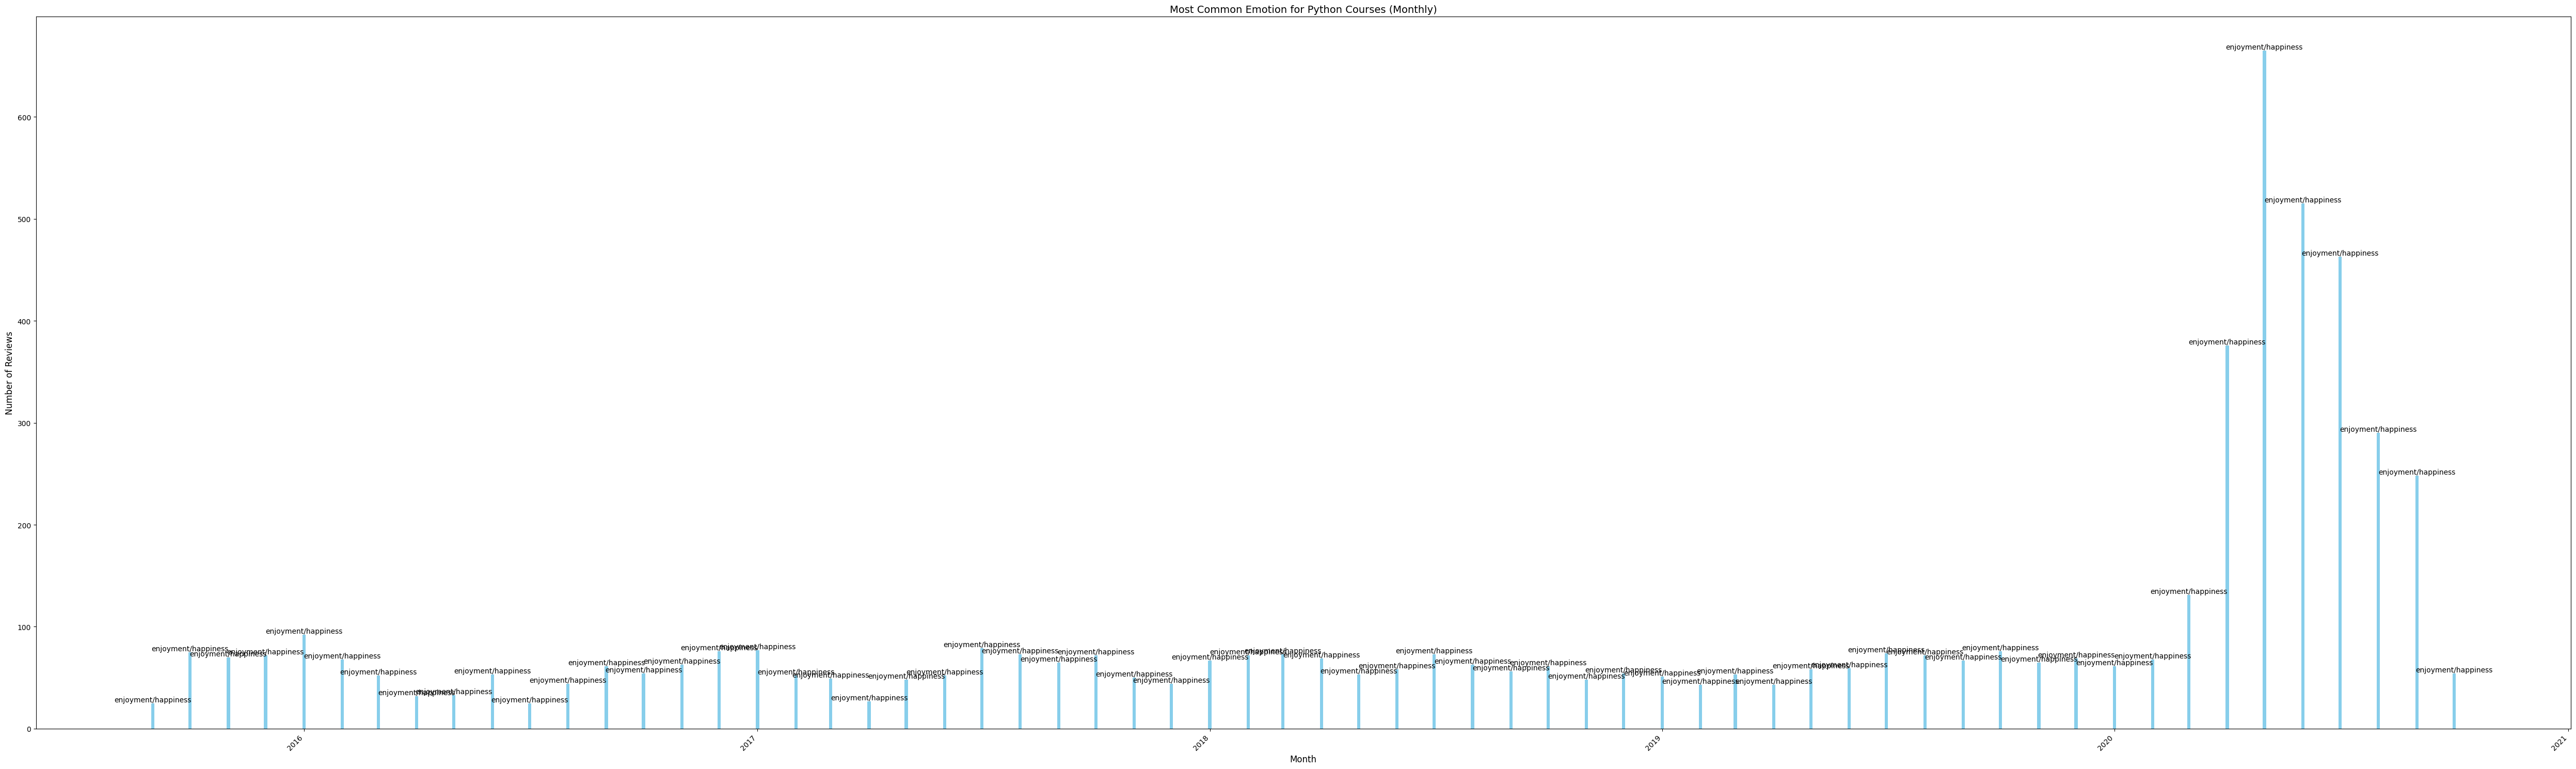

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by month and emotion, then count the occurrences of each emotion
monthly_emotion_counts = python_reviews.groupby(['month', 'joint_emotion_label']).size().unstack(fill_value=0)

# Find the most common emotion for each month (the one with the highest count in each month)
most_common_emotion_per_month = monthly_emotion_counts.idxmax(axis=1)

# Find the count of the most common emotion for each month
most_common_emotion_count_per_month = monthly_emotion_counts.max(axis=1)

# Plotting the most common emotion for each month
plt.figure(figsize=(50, 15))

# Create a bar plot for the most common emotion per month
bars = plt.bar(most_common_emotion_per_month.index, most_common_emotion_count_per_month, color='skyblue', width=2.6)  # Adjust width for spacing

# Add titles and labels
plt.title('Most Common Emotion for Python Courses (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add labels to each bar indicating the emotion
for bar, emotion in zip(bars, most_common_emotion_per_month):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), emotion,
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ensures everything fits without clipping
plt.show()


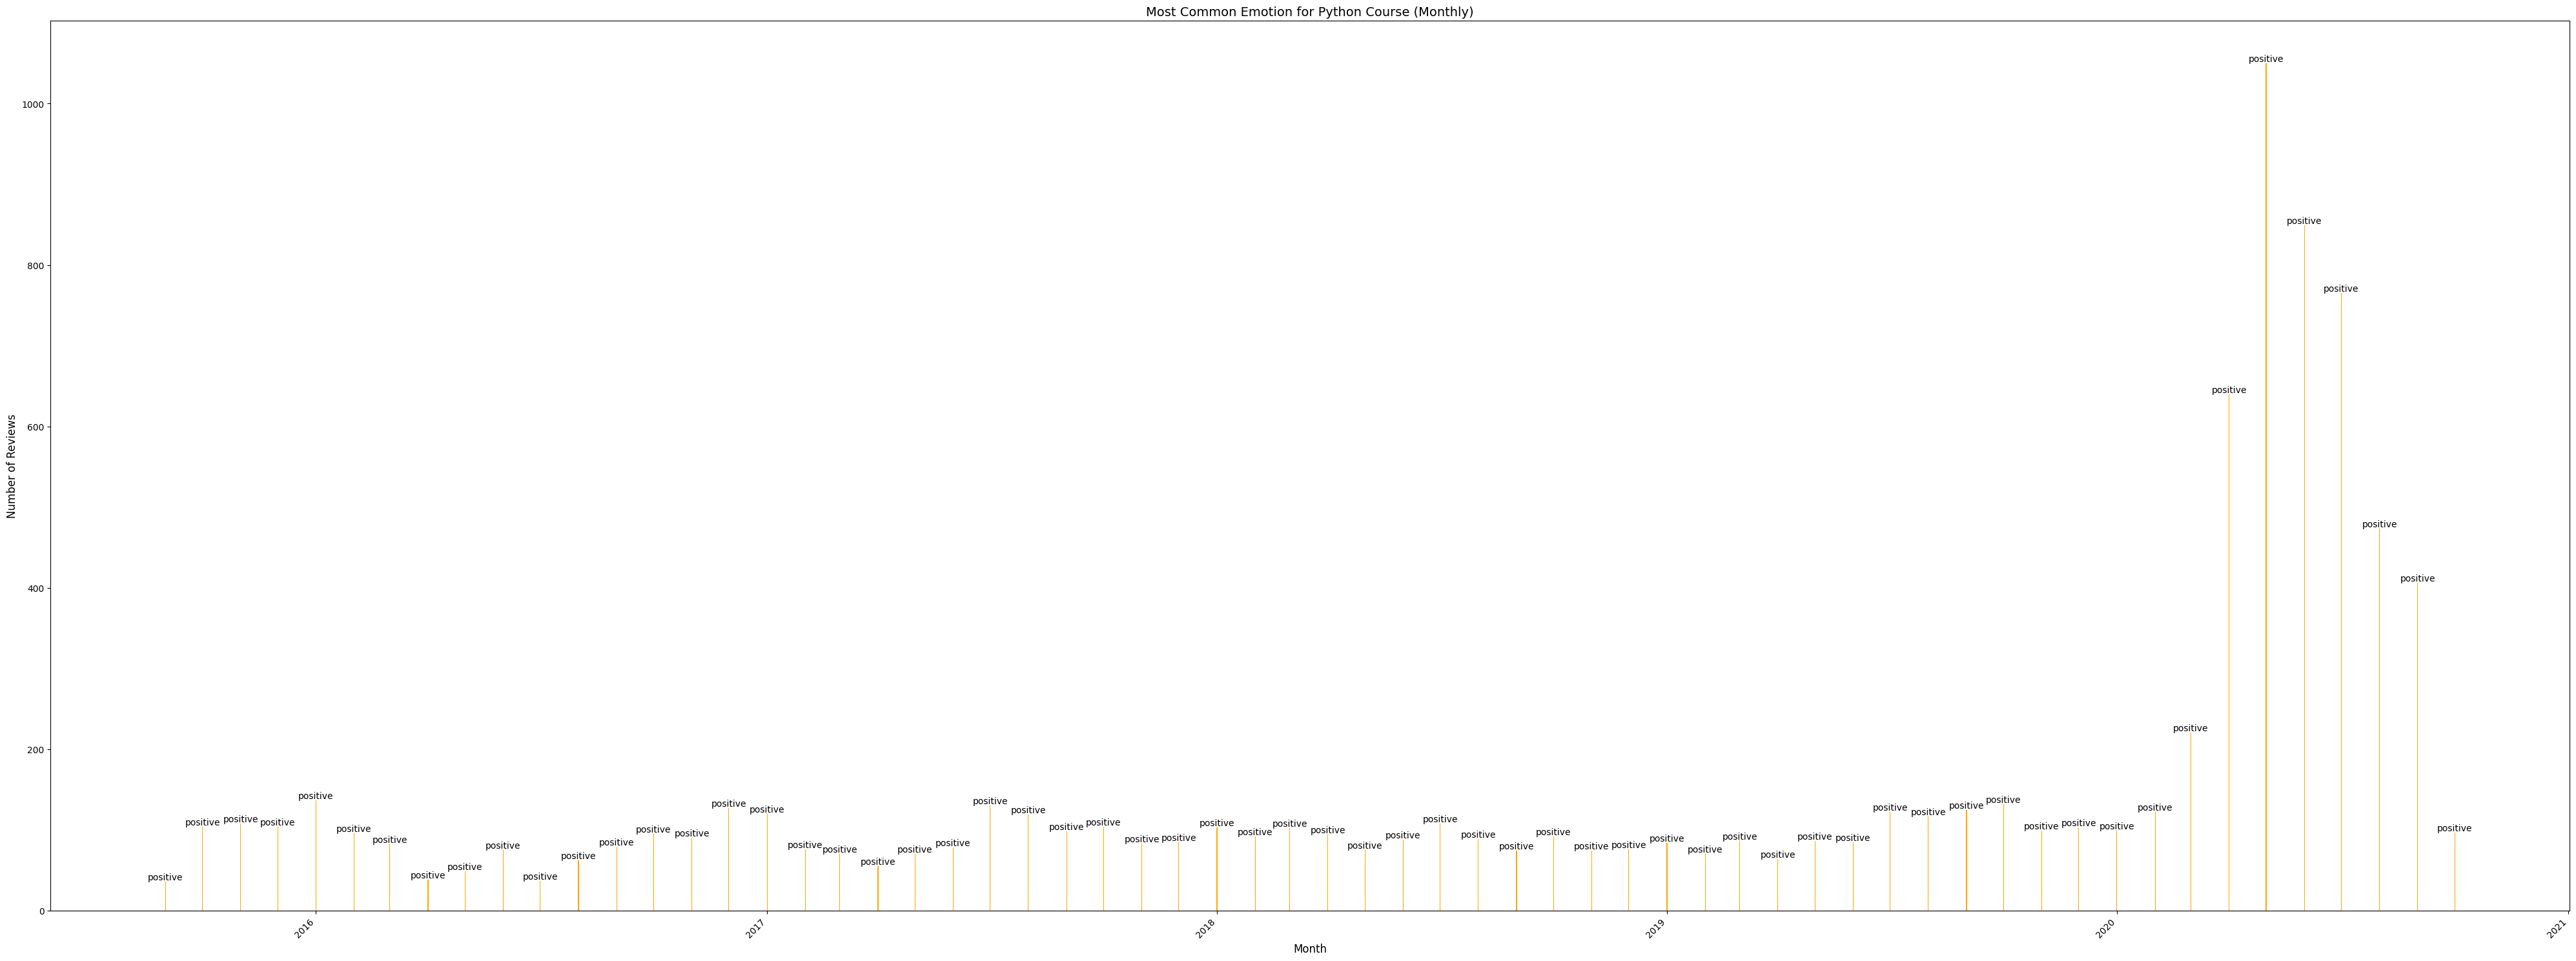

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by month and emotion, then count the occurrences of each emotion
monthly_emotion_counts = python_reviews.groupby(['month', 'sentiment_label_from_review']).size().unstack(fill_value=0)

# Find the most common emotion for each month (the one with the highest count in each month)
most_common_emotion_per_month = monthly_emotion_counts.idxmax(axis=1)

# Find the count of the most common emotion for each month
most_common_emotion_count_per_month = monthly_emotion_counts.max(axis=1)

# Plotting the most common emotion for each month
plt.figure(figsize=(40, 15))

# Create a bar plot for the most common emotion per month
bars = plt.bar(most_common_emotion_per_month.index, most_common_emotion_count_per_month, color='orange', width=0.6)  # Adjust width for spacing

# Add titles and labels
plt.title('Most Common Emotion for Python Course (Monthly)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add labels to each bar indicating the emotion
for bar, emotion in zip(bars, most_common_emotion_per_month):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), emotion,
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()  # Ensures everything fits without clipping
plt.show()


computing the last emotion improvement

In [ ]:
import pandas as pd

# Group by 'month' and calculate the average emotion score for each month
monthly_avg_emotion = python_reviews.groupby('month')['primary_emotion_label_score'].mean()

# Calculate the monthly changes to identify improvements
monthly_avg_emotion_diff = monthly_avg_emotion.diff()

# Find the last month where emotion score improved
last_emotion_improvement_month = monthly_avg_emotion_diff[monthly_avg_emotion_diff > 0].idxmax()

# Display the result
print(f"Last emotion improvement month: {last_emotion_improvement_month}")


Last emotion improvement month: 2016-04


computing the last sentiment improvement

In [ ]:
import pandas as pd

# Group by 'month' and calculate the average emotion score for each month
monthly_avg_rating = python_reviews.groupby('month')['rating'].mean()

# Calculate the monthly changes to identify improvements
monthly_avg_rating_diff = monthly_avg_rating.diff()

# Find the last month where emotion score improved
last_rating_improvement_month = monthly_avg_rating_diff[monthly_avg_rating_diff > 0].idxmax()

# Display the result
print(f"Last sentiment improvement month: {last_rating_improvement_month}")


Last sentiment improvement month: 2016-06


retreiving the most common topic

In [ ]:
import pandas as pd
from collections import Counter


# Flatten the lists from the 'topic_summary' column into one long list
all_topics = [topic for sublist in python_reviews['topic_summary'] for topic in sublist]

# Use Counter to count the frequency of each topic
topic_counts = Counter(all_topics)

# Find the most common topic
most_common_topic = topic_counts.most_common(1)

# Display the most common topic
print(f"The most common topic is: {most_common_topic[0][0]} with {most_common_topic[0][1]} occurrences.")


The most common topic is: Instructor with 7556 occurrences.


getting the most recent sentiment

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime using .loc to avoid SettingWithCopyWarning
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Get the most recent month
most_recent_month = python_reviews['month'].max()

# Step 3: Filter the data for the most recent month
recent_month_reviews = python_reviews[python_reviews['month'] == most_recent_month]

# Step 4: Count the frequency of each sentiment in the 'sentiment_label_from_review' column
sentiment_counts = recent_month_reviews['sentiment_label_from_review'].value_counts()

# Step 5: Get the most popular sentiment
most_recent_sentiment = sentiment_counts.idxmax()

# Display the result
print(f"The most popular sentiment in the most recent month ({most_recent_month.strftime('%Y-%m')}) is: {most_recent_sentiment}")


The most popular sentiment in the most recent month (2020-10) is: positive


getting the most recent emotion

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime using .loc to avoid SettingWithCopyWarning
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Get the most recent month
most_recent_month = python_reviews['month'].max()

# Step 3: Filter the data for the most recent month
recent_month_reviews = python_reviews[python_reviews['month'] == most_recent_month]

# Step 4: Count the frequency of each sentiment in the 'sentiment_label_from_review' column
emotion_counts = recent_month_reviews['joint_emotion_label'].value_counts()

# Step 5: Get the most popular sentiment
most_recent_emotion = emotion_counts.idxmax()

# Display the result
print(f"The most popular emotion in the most recent month ({most_recent_month.strftime('%Y-%m')}) is: {most_recent_emotion}")


The most popular emotion in the most recent month (2020-10) is: enjoyment/happiness


getting the number of months from the most recent month that the emotion has stayed the same.

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Get the most recent month and the emotion from that month
most_recent_month = python_reviews['month'].max()
recent_emotion = python_reviews[python_reviews['month'] == most_recent_month]['joint_emotion_label'].values[0]

# Step 3: Filter data from most recent month going backward
python_reviews_sorted = python_reviews[python_reviews['month'] <= most_recent_month].sort_values('month', ascending=False)

# Step 4: Count consecutive months where emotion stays the same
same_emotion_months = 0
for emotion in python_reviews_sorted['joint_emotion_label']:
    if emotion == recent_emotion:
        same_emotion_months += 1
    else:
        break  # Stop counting once the emotion changes

# Display the result
print(f"The emotion has stayed the same for {same_emotion_months} consecutive months starting from {most_recent_month.strftime('%Y-%m')}.")


The emotion has stayed the same for 2 consecutive months starting from 2020-10.


# months the sentiment has stayed the same

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Get the most recent month and the emotion from that month
most_recent_month = python_reviews['month'].max()
recent_rating = python_reviews[python_reviews['month'] == most_recent_month]['rating'].values[0]

# Step 3: Filter data from most recent month going backward
python_reviews_sorted = python_reviews[python_reviews['month'] <= most_recent_month].sort_values('month', ascending=False)

# Step 4: Count consecutive months where emotion stays the same
same_rating_months = 0
for rating in python_reviews_sorted['rating']:
    if rating== recent_rating:
        same_rating_months += 1
    else:
        break  # Stop counting once the emotion changes

# Display the result
print(f"The sentiment has stayed the same for {same_rating_months} consecutive months starting from {most_recent_month.strftime('%Y-%m')}.")


The sentiment has stayed the same for 11 consecutive months starting from 2020-10.


In [ ]:
most_common_sentiment = python_reviews['sentiment_from_rating'].value_counts().idxmax()
most_common_emotion = python_reviews['joint_emotion_label'].value_counts().idxmax()

In [ ]:
most_common_sentiment = python_reviews['sentiment_from_rating'].value_counts().idxmax()
most_common_emotion = python_reviews['joint_emotion_label'].value_counts().idxmax()

outlook_str = f'''Most reviews are {most_common_sentiment} and about {most_common_topic} with most students feeling {most_common_emotion}.
There has been no improvement in sentiment since {last_rating_improvement_month} and the last improvement in emotion
was in {last_emotion_improvement_month}. The most recent reviews are {most_recent_sentiment} and {most_recent_emotion}.
Over the existence of the course, the number of {most_common_sentiment} and {most_common_emotion} reviews has increased.
The sentiment has stayed the same for {same_rating_months} consecutive months and the emotion has stayed the same for
{same_emotion_months} consecutive months.'''

computing the topic outlook

unique topics for the python subset:


In [ ]:
# Flatten the topic_summary column into a list of topics
all_topics = [topic for sublist in python_reviews['topic_summary'] for topic in sublist]

# Get unique topics
unique_topics = set(all_topics)

# Count the number of unique topics
num_unique_topics = len(unique_topics)

# Display the results
print(f"Number of unique topics: {num_unique_topics}")
print(f"Unique topics: {sorted(unique_topics)}")

Number of unique topics: 12
Unique topics: ['Assignments', 'Course Engagement and Course Feelings(Sentiment)', 'Course Material', 'Course Material and Understanding', 'Course Structure', 'Exams', 'Grading', 'Instructor', 'Learning Outcomes', 'Lectures', 'Utility and Usefulness', 'Workload']


computing the last emotion improvement

In [ ]:
import pandas as pd

# Step 1: Flatten the 'topic_summary' column into a list of topics and repeat the reviews for each topic
python_reviews_exploded = python_reviews.explode('topic_summary')

# Step 2: Group by 'topic_summary' and 'month' to calculate the average emotion score for each topic per month
monthly_avg_emotion_per_topic = python_reviews_exploded.groupby(['month', 'topic_summary'])['emotion_label_score'].mean().reset_index()

# Step 3: Calculate the monthly changes (difference) for each topic
monthly_avg_emotion_per_topic['emotion_label_score_diff'] = monthly_avg_emotion_per_topic.groupby('topic_summary')['emotion_label_score'].diff()

# Step 4: Find the last month where the emotion score improved for each unique topic
last_improvement_per_topic = monthly_avg_emotion_per_topic[monthly_avg_emotion_per_topic['emotion_label_score_diff'] > 0].groupby('topic_summary')['month'].max()

# Step 5: Display the results
for topic, last_improvement_month in last_improvement_per_topic.items():
    print(f"Last emotion improvement month for topic '{topic}': {last_improvement_month.strftime('%Y-%m')}")


Last emotion improvement month for topic 'Assignments': 2020-10
Last emotion improvement month for topic 'Course Engagement and Course Feelings(Sentiment)': 2020-10
Last emotion improvement month for topic 'Course Material': 2020-08
Last emotion improvement month for topic 'Course Material and Understanding': 2020-10
Last emotion improvement month for topic 'Course Structure': 2020-09
Last emotion improvement month for topic 'Exams': 2020-10
Last emotion improvement month for topic 'Grading': 2020-10
Last emotion improvement month for topic 'Instructor': 2020-09
Last emotion improvement month for topic 'Learning Outcomes': 2020-08
Last emotion improvement month for topic 'Lectures': 2020-08
Last emotion improvement month for topic 'Utility and Usefulness': 2020-09
Last emotion improvement month for topic 'Workload': 2020-08


computing the last sentiment improvement

In [ ]:
import pandas as pd

python_reviews_exploded = python_reviews.explode('topic_summary')

# Step 2: Group by 'topic_summary' and 'month' to calculate the average rating (or emotion score) for each topic per month
monthly_avg_rating_per_topic = python_reviews_exploded.groupby(['month', 'topic_summary'])['rating'].mean().reset_index()

# Step 3: Calculate the monthly changes (difference) in rating for each topic
monthly_avg_rating_per_topic['rating_diff'] = monthly_avg_rating_per_topic.groupby('topic_summary')['rating'].diff()

# Step 4: Find the last month where the rating improved for each unique topic
last_improvement_per_topic = monthly_avg_rating_per_topic[monthly_avg_rating_per_topic['rating_diff'] > 0].groupby('topic_summary')['month'].max()

# Step 5: Display the result
for topic, last_improvement_month in last_improvement_per_topic.items():
    print(f"Last sentiment improvement month for topic '{topic}': {last_improvement_month.strftime('%Y-%m')}")


Last sentiment improvement month for topic 'Assignments': 2020-10
Last sentiment improvement month for topic 'Course Engagement and Course Feelings(Sentiment)': 2020-10
Last sentiment improvement month for topic 'Course Material': 2020-09
Last sentiment improvement month for topic 'Course Material and Understanding': 2020-10
Last sentiment improvement month for topic 'Course Structure': 2020-10
Last sentiment improvement month for topic 'Exams': 2020-10
Last sentiment improvement month for topic 'Grading': 2020-10
Last sentiment improvement month for topic 'Instructor': 2020-07
Last sentiment improvement month for topic 'Learning Outcomes': 2020-09
Last sentiment improvement month for topic 'Lectures': 2020-10
Last sentiment improvement month for topic 'Utility and Usefulness': 2020-10
Last sentiment improvement month for topic 'Workload': 2020-10


getting the most recent sentiment

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime using .loc to avoid SettingWithCopyWarning
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Get the most recent month
most_recent_month = python_reviews['month'].max()

# Step 3: Filter the data for the most recent month
recent_month_reviews = python_reviews[python_reviews['month'] == most_recent_month]

# Step 4: Explode the 'topic_summary' column (to handle multiple topics per review)
recent_month_reviews_exploded = recent_month_reviews.explode('topic_summary')

# Step 5: Get the unique topics
unique_topics = recent_month_reviews_exploded['topic_summary'].unique()

# Step 6: Loop through each topic in unique_topics and calculate the most popular sentiment for that topic
for topic in unique_topics:
    # Filter reviews for the current topic
    topic_reviews = recent_month_reviews_exploded[recent_month_reviews_exploded['topic_summary'] == topic]

    # Count the frequency of each sentiment for this topic
    sentiment_counts = topic_reviews['sentiment_label_from_review'].value_counts()

    # Find the most popular sentiment
    most_popular_sentiment = sentiment_counts.idxmax()
    sentiment_count = sentiment_counts.max()

    # Print the most popular sentiment for this topic
    print(f"For topic '{topic}' in {most_recent_month.strftime('%Y-%m')}, the most popular sentiment is: '{most_popular_sentiment}' with {sentiment_count} occurrences.")


For topic 'Course Material and Understanding' in 2020-10, the most popular sentiment is: 'positive' with 76 occurrences.
For topic 'Utility and Usefulness' in 2020-10, the most popular sentiment is: 'positive' with 54 occurrences.
For topic 'Instructor' in 2020-10, the most popular sentiment is: 'positive' with 70 occurrences.
For topic 'Lectures' in 2020-10, the most popular sentiment is: 'positive' with 14 occurrences.
For topic 'Learning Outcomes' in 2020-10, the most popular sentiment is: 'positive' with 15 occurrences.
For topic 'Assignments' in 2020-10, the most popular sentiment is: 'positive' with 13 occurrences.
For topic 'Course Engagement and Course Feelings(Sentiment)' in 2020-10, the most popular sentiment is: 'positive' with 5 occurrences.
For topic 'Exams' in 2020-10, the most popular sentiment is: 'positive' with 4 occurrences.
For topic 'Course Material' in 2020-10, the most popular sentiment is: 'positive' with 19 occurrences.
For topic 'Grading' in 2020-10, the most 

getting the most recent emotion

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime using .loc to avoid SettingWithCopyWarning
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Get the most recent month
most_recent_month = python_reviews['month'].max()

# Step 3: Filter the data for the most recent month
recent_month_reviews = python_reviews[python_reviews['month'] == most_recent_month]

# Step 4: Explode the 'topic_summary' column (to handle multiple topics per review)
recent_month_reviews_exploded = recent_month_reviews.explode('topic_summary')

# Step 5: Get the unique topics
unique_topics = recent_month_reviews_exploded['topic_summary'].unique()

# Step 6: Loop through each unique topic and calculate the most popular emotion for that topic
for topic in unique_topics:
    # Filter reviews for the current topic
    topic_reviews = recent_month_reviews_exploded[recent_month_reviews_exploded['topic_summary'] == topic]

    # Count the frequency of each emotion for this topic
    emotion_counts = topic_reviews['emotion_label'].value_counts()

    # Find the most popular emotion
    most_popular_emotion = emotion_counts.idxmax()
    emotion_count = emotion_counts.max()

    # Print the most popular emotion for this topic
    print(f"For topic '{topic}' in {most_recent_month.strftime('%Y-%m')}, the most popular emotion is: '{most_popular_emotion}' with {emotion_count} occurrences.")


For topic 'Course Material and Understanding' in 2020-10, the most popular emotion is: 'enjoyment/happiness' with 46 occurrences.
For topic 'Utility and Usefulness' in 2020-10, the most popular emotion is: 'enjoyment/happiness' with 27 occurrences.
For topic 'Instructor' in 2020-10, the most popular emotion is: 'enjoyment/happiness' with 42 occurrences.
For topic 'Lectures' in 2020-10, the most popular emotion is: 'enjoyment/happiness' with 7 occurrences.
For topic 'Learning Outcomes' in 2020-10, the most popular emotion is: 'enjoyment/happiness' with 8 occurrences.
For topic 'Assignments' in 2020-10, the most popular emotion is: 'enjoyment/happiness' with 8 occurrences.
For topic 'Course Engagement and Course Feelings(Sentiment)' in 2020-10, the most popular emotion is: 'enjoyment/happiness' with 3 occurrences.
For topic 'Exams' in 2020-10, the most popular emotion is: 'enjoyment/happiness' with 2 occurrences.
For topic 'Course Material' in 2020-10, the most popular emotion is: 'enjoy

getting the number of months from the most recent month that the emotion has stayed the same.

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Get the most recent month
most_recent_month = python_reviews['month'].max()

# Step 3: Explode the 'topic_summary' column (if there are multiple topics per review)
python_reviews_exploded = python_reviews.explode('topic_summary')

# Step 4: Get unique topics from the exploded column
unique_topics = python_reviews_exploded['topic_summary'].unique()

# Step 5: Loop through each unique topic
for topic in unique_topics:
    # Filter the reviews for the current topic
    topic_reviews = python_reviews_exploded[python_reviews_exploded['topic_summary'] == topic]

    # Step 6: Get the most recent emotion for this topic
    most_recent_emotion = topic_reviews[topic_reviews['month'] == most_recent_month]['emotion_label'].values[0]

    # Step 7: Sort the data for the current topic by month (descending order)
    topic_reviews_sorted = topic_reviews.sort_values('month', ascending=False)

    # Step 8: Count consecutive months where the emotion stays the same for this topic
    same_emotion_months = 0
    for emotion in topic_reviews_sorted['emotion_label']:
        if emotion == most_recent_emotion:
            same_emotion_months += 1
        else:
            break  # Stop counting once the emotion changes

    # Step 9: Display the result for this topic
    print(f"For topic '{topic}', the emotion has stayed the same for {same_emotion_months} consecutive months starting from {most_recent_month.strftime('%Y-%m')}.")


For topic 'Course Material and Understanding', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Utility and Usefulness', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Instructor', the emotion has stayed the same for 1 consecutive months starting from 2020-10.
For topic 'Lectures', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Learning Outcomes', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Course Engagement and Course Feelings(Sentiment)', the emotion has stayed the same for 1 consecutive months starting from 2020-10.
For topic 'Course Material', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Course Structure', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Workload', the emotion has stayed the same for 0 consecutive months 

# months the sentiment has stayed the same

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Get the most recent month
most_recent_month = python_reviews['month'].max()

# Step 3: Explode the 'topic_summary' column (if there are multiple topics per review)
python_reviews_exploded = python_reviews.explode('topic_summary')

# Step 4: Get unique topics from the exploded column
unique_topics = python_reviews_exploded['topic_summary'].unique()

# Step 5: Loop through each unique topic
for topic in unique_topics:
    # Filter the reviews for the current topic
    topic_reviews = python_reviews_exploded[python_reviews_exploded['topic_summary'] == topic]

    # Step 6: Get the most recent rating for this topic
    recent_rating = topic_reviews[topic_reviews['month'] == most_recent_month]['rating'].values[0]

    # Step 7: Sort the data for the current topic by month (descending order)
    topic_reviews_sorted = topic_reviews.sort_values('month', ascending=False)

    # Step 8: Count consecutive months where the rating stays the same for this topic
    same_rating_months = 0
    for rating in topic_reviews_sorted['rating']:
        if rating == recent_rating:
            same_rating_months += 1
        else:
            break  # Stop counting once the rating changes

    # Step 9: Display the result for this topic
    print(f"For topic '{topic}', the sentiment (rating) has stayed the same for {same_rating_months} consecutive months starting from {most_recent_month.strftime('%Y-%m')}.")


For topic 'Course Material and Understanding', the sentiment (rating) has stayed the same for 5 consecutive months starting from 2020-10.
For topic 'Utility and Usefulness', the sentiment (rating) has stayed the same for 17 consecutive months starting from 2020-10.
For topic 'Instructor', the sentiment (rating) has stayed the same for 7 consecutive months starting from 2020-10.
For topic 'Lectures', the sentiment (rating) has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Learning Outcomes', the sentiment (rating) has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Course Engagement and Course Feelings(Sentiment)', the sentiment (rating) has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Course Material', the sentiment (rating) has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Course Structure', the sentiment (rating) has stayed the same for 2 consecutive months starting from

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Explode the 'topic_summary' column (if there are multiple topics per review)
python_reviews_exploded = python_reviews.explode('topic_summary')

# Step 3: Get unique topics from the exploded column
unique_topics = python_reviews_exploded['topic_summary'].unique()

# Step 4: Loop through each unique topic and compute the most common sentiment and emotion
for topic in unique_topics:
    # Filter the reviews for the current topic
    topic_reviews = python_reviews_exploded[python_reviews_exploded['topic_summary'] == topic]

    # Step 5: Find the most common sentiment for the current topic
    most_common_sentiment_for_topic = topic_reviews['sentiment_from_rating'].value_counts().idxmax()

    # Step 6: Find the most common emotion for the current topic
    most_common_emotion_for_topic = topic_reviews['emotion_label'].value_counts().idxmax()

    # Step 7: Display the result for this topic
    print(f"For topic '{topic}':")
    print(f"  Most common sentiment: {most_common_sentiment}")
    print(f"  Most common emotion: {most_common_emotion}")
    print("-" * 50)


For topic 'Course Material and Understanding':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 'Utility and Usefulness':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 'Instructor':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 'Lectures':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 'Learning Outcomes':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 'Course Engagement and Course Feelings(Sentiment)':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 

In [ ]:
topics =
for topic in unique_topics:
  outlook_str = f'''Most reviews on this {topic} are {most_common_sentiment} and about {most_common_topic} with most students feeling {most_common_emotion}.
  There has been no improvement in sentiment since {last_rating_improvement_month} and the last improvement in emotion
  was in {last_emotion_improvement_month}. The most recent reviews are {most_recent_sentiment} and {most_recent_emotion}.
  Over the existence of the course, the number of {most_common_sentiment} and {most_common_emotion} reviews has increased.
  The sentiment has stayed the same for {same_rating_months} consecutive months and the emotion has stayed the same for
  {same_emotion_months} consecutive months.'''

In [ ]:
import pandas as pd

  # Step 1: Convert the 'month' column to datetime
  python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

  # Step 2: Explode the 'topic_summary' column (if there are multiple topics per review)
  python_reviews_exploded = python_reviews.explode('topic_summary')

  # Step 3: Get unique topics from the exploded column
  unique_topics = python_reviews_exploded['topic_summary'].unique()

  # Step 4: Loop through each unique topic and compute the most common sentiment and emotion
  for topic in unique_topics:
      # Filter the reviews for the current topic
      topic_reviews = python_reviews_exploded[python_reviews_exploded['topic_summary'] == topic]

      # Step 5: Find the most common sentiment for the current topic
      most_common_sentiment_for_topic = topic_reviews['sentiment_from_rating'].value_counts().idxmax()

      # Step 6: Find the most common emotion for the current topic
      most_common_emotion_for_topic = topic_reviews['emotion_label'].value_counts().idxmax()

      # Step 7: Display the result for this topic
      print(f"For topic '{topic}':")
      print(f"  Most common sentiment: {most_common_sentiment}")
      print(f"  Most common emotion: {most_common_emotion}")
      print("-" * 50)


For topic 'Course Material and Understanding':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 'Utility and Usefulness':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 'Instructor':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 'Lectures':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 'Learning Outcomes':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 'Course Engagement and Course Feelings(Sentiment)':
  Most common sentiment: positive
  Most common emotion: enjoyment/happiness
--------------------------------------------------
For topic 

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Get the most recent month
most_recent_month = python_reviews['month'].max()

# Step 3: Explode the 'topic_summary' column (if there are multiple topics per review)
python_reviews_exploded = python_reviews.explode('topic_summary')

# Step 4: Get unique topics from the exploded column
unique_topics = python_reviews_exploded['topic_summary'].unique()

# Step 5: Loop through each unique topic
for topic in unique_topics:
    # Filter the reviews for the current topic
    topic_reviews = python_reviews_exploded[python_reviews_exploded['topic_summary'] == topic]

    # Step 6: Get the most recent emotion for this topic
    most_recent_emotion = topic_reviews[topic_reviews['month'] == most_recent_month]['emotion_label'].values[0]

    # Step 7: Sort the data for the current topic by month (descending order)
    topic_reviews_sorted = topic_reviews.sort_values('month', ascending=False)

    # Step 8: Count consecutive months where the emotion stays the same for this topic
    same_emotion_months = 0
    for emotion in topic_reviews_sorted['emotion_label']:
        if emotion == most_recent_emotion:
            same_emotion_months += 1
        else:
            break  # Stop counting once the emotion changes

    # Step 9: Display the result for this topic
    print(f"For topic '{topic}', the emotion has stayed the same for {same_emotion_months} consecutive months starting from {most_recent_month.strftime('%Y-%m')}.")


For topic 'Course Material and Understanding', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Utility and Usefulness', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Instructor', the emotion has stayed the same for 1 consecutive months starting from 2020-10.
For topic 'Lectures', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Learning Outcomes', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Course Engagement and Course Feelings(Sentiment)', the emotion has stayed the same for 1 consecutive months starting from 2020-10.
For topic 'Course Material', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Course Structure', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Workload', the emotion has stayed the same for 0 consecutive months 

In [ ]:
import pandas as pd

# Step 1: Convert the 'month' column to datetime
python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

# Step 2: Get the most recent month
most_recent_month = python_reviews['month'].max()

# Step 3: Explode the 'topic_summary' column (if there are multiple topics per review)
python_reviews_exploded = python_reviews.explode('topic_summary')

# Step 4: Get unique topics from the exploded column
unique_topics = python_reviews_exploded['topic_summary'].unique()

# Step 5: Loop through each unique topic
for topic in unique_topics:
    # Filter the reviews for the current topic
    topic_reviews = python_reviews_exploded[python_reviews_exploded['topic_summary'] == topic]

    # Step 6: Get the most recent emotion for this topic
    most_recent_emotion = topic_reviews[topic_reviews['month'] == most_recent_month]['emotion_label'].values[0]

    # Step 7: Sort the data for the current topic by month (descending order)
    topic_reviews_sorted = topic_reviews.sort_values('month', ascending=False)

    # Step 8: Count consecutive months where the emotion stays the same for this topic
    same_emotion_months = 0
    for emotion in topic_reviews_sorted['emotion_label']:
        if emotion == most_recent_emotion:
            same_emotion_months += 1
        else:
            break  # Stop counting once the emotion changes

    # Step 9: Display the result for this topic
    print(f"For topic '{topic}', the emotion has stayed the same for {same_emotion_months} consecutive months starting from {most_recent_month.strftime('%Y-%m')}.")


For topic 'Course Material and Understanding', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Utility and Usefulness', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Instructor', the emotion has stayed the same for 1 consecutive months starting from 2020-10.
For topic 'Lectures', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Learning Outcomes', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Course Engagement and Course Feelings(Sentiment)', the emotion has stayed the same for 1 consecutive months starting from 2020-10.
For topic 'Course Material', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Course Structure', the emotion has stayed the same for 0 consecutive months starting from 2020-10.
For topic 'Workload', the emotion has stayed the same for 0 consecutive months 

In [ ]:
'''the flow should be like soemthing this:
 -- python module ---

 Select an option:
1. View the Outlook
2. View the Time Series Analysis
3. View the Topics
4. Exit

Enter your choice (1/2/3/4): 3
 Select an option:
1. topic 1
2. topic 2
3. topic 3
4. topic 4
...
12. topic 12
13. Exit

Enter your choice (1/2/3/4/.../12): 1
 Select an option for this topic:
1. View the Outlook
2. View the Time Series Analysis
3. Exit

Enter your choice (1/2/3): 2

Select type of time series plot:
1. Emotion
2. Sentiment
3. Exit
Enter your choice (1/2/3): 2

Select type of time series plot:
1. Emotion
2. Sentiment
3. Exit

Enter your choice (1/2/3): 3

 Select an option for this topic:
1. View the Outlook
2. View the Time Series Analysis
3. Exit

Enter your choice (1/2/3): 3

1. topic 1
2. topic 2
3. topic 3
4. topic 4
...
12. topic 12
13. Exit

Enter your choice (1/2/3): 13

 -- python module ---

 Select an option:
1. View the Outlook
2. View the Time Series Analysis
3. View the Topics
4. Exit

Enter your choice (1/2/3/4): 1

This module is blah blah blah
'''

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

def plot_time_series_emotion():
    # Group by month and emotion, then count the occurrences of each emotion
    monthly_emotion_counts = python_reviews.groupby(['month', 'joint_emotion_label']).size().unstack(fill_value=0)

    # Find the most common emotion for each month (the one with the highest count in each month)
    most_common_emotion_per_month = monthly_emotion_counts.idxmax(axis=1)

    # Find the count of the most common emotion for each month
    most_common_emotion_count_per_month = monthly_emotion_counts.max(axis=1)

    # Plotting the most common emotion for each month
    plt.figure(figsize=(50, 20))  # Adjusted figure size for better visibility

    # Create a bar plot for the most common emotion per month
    bars = plt.bar(most_common_emotion_per_month.index, most_common_emotion_count_per_month, color='skyblue', width=0.6)

    # Add titles and labels
    plt.title('Most Common Emotion for Python Courses (Monthly)', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Add labels to each bar indicating the emotion
    for bar, emotion in zip(bars, most_common_emotion_per_month):
        # Position text inside bars or above, based on height
        y_position = bar.get_height() + 10 if bar.get_height() > 10 else bar.get_height() - 5
        plt.text(bar.get_x() + bar.get_width() / 2, y_position, emotion,
                 ha='center', va='bottom' if bar.get_height() > 10 else 'top', fontsize=10)

    plt.tight_layout()  # Ensures everything fits without clipping
    plt.show()


def plot_time_series_sentiment():
    # Group by month and sentiment, then count the occurrences of each sentiment
    monthly_emotion_counts = python_reviews.groupby(['month', 'sentiment_label_from_review']).size().unstack(fill_value=0)

    # Find the most common sentiment for each month (the one with the highest count in each month)
    most_common_sentiment_per_month = monthly_emotion_counts.idxmax(axis=1)

    # Find the count of the most common sentiment for each month
    most_common_sentiment_count_per_month = monthly_emotion_counts.max(axis=1)

    # Plotting the most common sentiment for each month
    plt.figure(figsize=(50, 20))  # Adjusted figure size to fit most screen sizes

    # Create a bar plot for the most common sentiment per month
    bars = plt.bar(most_common_sentiment_per_month.index, most_common_sentiment_count_per_month, width=0.6)

    # Add titles and labels
    plt.title('Most Common Sentiment for Python Course (Monthly)', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Add labels to each bar indicating the sentiment
    for bar, sentiment in zip(bars, most_common_sentiment_per_month):
        # Position text inside bars or above, based on height
        y_position = bar.get_height() + 10 if bar.get_height() > 10 else bar.get_height() - 5
        plt.text(bar.get_x() + bar.get_width() / 2, y_position, sentiment,
                 ha='center', va='bottom' if bar.get_height() > 10 else 'top', fontsize=10)

    plt.tight_layout()  # Ensures everything fits without clipping
    plt.show()


def compute_outlook():
    # Step 1: Group by 'month' and calculate the average emotion score for each month
    monthly_avg_emotion = python_reviews.groupby('month')['primary_emotion_label_score'].mean()
    monthly_avg_emotion_diff = monthly_avg_emotion.diff()

    # Find the last month where emotion score improved
    last_emotion_improvement_month = monthly_avg_emotion_diff[monthly_avg_emotion_diff > 0].idxmax()

    # Step 2: Group by 'month' and calculate the average rating for each month
    monthly_avg_rating = python_reviews.groupby('month')['rating'].mean()
    monthly_avg_rating_diff = monthly_avg_rating.diff()

    # Find the last month where rating improved
    last_rating_improvement_month = monthly_avg_rating_diff[monthly_avg_rating_diff > 0].idxmax()

    # Step 3: Flatten the lists from the 'topic_summary' column into one long list
    all_topics = [topic for sublist in python_reviews['topic_summary'] for topic in sublist]
    topic_counts = Counter(all_topics)
    most_common_topic = topic_counts.most_common(1)[0]

    # Step 4: Get the most recent month
    python_reviews['month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')
    most_recent_month = python_reviews['month'].max()

    # Step 5: Find the most popular sentiment and emotion for the most recent month
    recent_month_reviews = python_reviews[python_reviews['month'] == most_recent_month]
    most_recent_sentiment = recent_month_reviews['sentiment_label_from_review'].value_counts().idxmax()
    most_recent_emotion = recent_month_reviews['joint_emotion_label'].value_counts().idxmax()

    # Step 6: Count consecutive months where the sentiment and emotion stayed the same
    same_rating_months = count_consecutive_months(python_reviews, most_recent_month, 'rating')
    same_emotion_months = count_consecutive_months(python_reviews, most_recent_month, 'primary_emotion_label')

    # Prepare the final outlook string
    outlook_str = f'''
    Most reviews are {most_recent_sentiment} and about {most_common_topic[0]} with most students feeling {most_recent_emotion}.
    There has been no improvement in sentiment since {last_rating_improvement_month.strftime('%Y-%m')} and the last improvement in emotion
    was in {last_emotion_improvement_month.strftime('%Y-%m')}.
    The most recent reviews are {most_recent_sentiment} and {most_recent_emotion}.
    Over the existence of the course, the number of {most_recent_sentiment} and {most_recent_emotion} reviews has increased.
    The sentiment has stayed the same for {same_rating_months} consecutive months and the emotion has stayed the same for
    {same_emotion_months} consecutive months.
    '''

    # Return or print the final outlook string
    print(outlook_str)

def count_consecutive_months(df, most_recent_month, column):
    # Filter data from the most recent month going backward
    df_sorted = df[df['month'] <= most_recent_month].sort_values('month', ascending=False)

    # Get the most recent value for the column
    recent_value = df_sorted[df_sorted['month'] == most_recent_month][column].values[0]

    # Count consecutive months where the value stays the same
    count = 0
    for value in df_sorted[column]:
        if value == recent_value:
            count += 1
        else:
            break
    return count

def compute_topics():
  # Flatten the topic_summary column into a list of topics
  all_topics = [topic for sublist in python_reviews['topic_summary'] for topic in sublist]

  # Get unique topics
  unique_topics = set(all_topics)

  # Count the number of unique topics
  num_unique_topics = len(unique_topics)

  # Display the results
  print(f"Number of unique topics: {num_unique_topics}")
  print(f"Unique topics: {sorted(unique_topics)}")

def compute_outlook_by_topic(topic):
    # Step 1: Convert the 'month' column to datetime to ensure proper time series analysis
    python_reviews.loc[:, 'month'] = pd.to_datetime(python_reviews['month'], format='%Y-%m')

    # Step 2: Explode the 'topic_summary' column (if there are multiple topics per review)
    python_reviews_exploded = python_reviews.explode('topic_summary')

    # Step 3: Filter the reviews for the specific topic and create a copy to avoid warnings
    topic_reviews = python_reviews_exploded[python_reviews_exploded['topic_summary'] == topic].copy()

    # Step 4: Map sentiment and emotion to numerical values
    sentiment_mapping = {'positive': 1, 'neutral': 0, 'negative': -1}
    emotion_mapping = {
    "enjoyment/happiness": 5,
    "gratitude": 4,
    "approval": 4,
    "love": 5,
    "excitement": 5,
    "joy": 5,
    "optimism": 4,
    "desire": 4,
    "realization": 3,
    "caring": 4,
    "amusement": 3,
    "curiosity": 3,
    "pride": 4,
    "surprise": 3,
    "relief": 4,
    "confusion": 0,
    "annoyance": -2,
    "embarrassment": -3,
    "disappointment": -3,
    "nervousness": -2,
    "sadness": -4,
    "fear": -4,
    "disgust": -5,
    "anger": -5,
    "remorse": -4
    }
    topic_reviews['sentiment_numerical'] = topic_reviews['sentiment_label_from_review'].map(sentiment_mapping)
    topic_reviews['emotion_numerical'] = topic_reviews['primary_emotion_label'].map(emotion_mapping)

    # Step 5: Calculate most recent data
    most_recent_month = topic_reviews['month'].max()
    recent_month_reviews = topic_reviews[topic_reviews['month'] == most_recent_month]

    # Calculate the most common sentiment and emotion for this topic
    most_common_sentiment = recent_month_reviews['sentiment_label_from_review'].value_counts().idxmax()
    most_common_emotion = recent_month_reviews['emotion_label'].value_counts().idxmax()

    # Step 6: Calculate sentiment and emotion improvements over time
    # For sentiment
    monthly_avg_sentiment = topic_reviews.groupby(['month'])['sentiment_numerical'].mean().reset_index()
    monthly_avg_sentiment['sentiment_diff'] = monthly_avg_sentiment['sentiment_numerical'].diff()
    last_sentiment_improvement_month = monthly_avg_sentiment[monthly_avg_sentiment['sentiment_diff'] > 0].iloc[-1]['month'] \
        if not monthly_avg_sentiment[monthly_avg_sentiment['sentiment_diff'] > 0].empty else None

    # For emotion
    monthly_avg_emotion = topic_reviews.groupby(['month'])['emotion_numerical'].mean().reset_index()
    monthly_avg_emotion['emotion_diff'] = monthly_avg_emotion['emotion_numerical'].diff()
    last_emotion_improvement_month = monthly_avg_emotion[monthly_avg_emotion['emotion_diff'] > 0].iloc[-1]['month'] \
        if not monthly_avg_emotion[monthly_avg_emotion['emotion_diff'] > 0].empty else None

    # Step 7: Calculate consecutive months where sentiment and emotion have stayed the same
    sentiment_sorted = topic_reviews.sort_values('month', ascending=False)
    most_recent_sentiment = sentiment_sorted.iloc[0]['sentiment_label_from_review']
    sentiment_streak_months = 0
    for sentiment in sentiment_sorted['sentiment_label_from_review']:
        if sentiment == most_recent_sentiment:
            sentiment_streak_months += 1
        else:
            break

    emotion_sorted = topic_reviews.sort_values('month', ascending=False)
    most_recent_emotion = emotion_sorted.iloc[0]['emotion_label']
    emotion_streak_months = 0
    for emotion in emotion_sorted['emotion_label']:
        if emotion == most_recent_emotion:
            emotion_streak_months += 1
        else:
            break

    # Step 8: Formulate the outlook for the topic
    outlook_str = f'''
    Outlook for Topic: "{topic}"
    -------------------------------

    Most reviews for the topic are "{most_common_sentiment}" and about "{most_common_emotion}".
    There has been no improvement in sentiment since {last_sentiment_improvement_month.strftime('%Y-%m') if last_sentiment_improvement_month else 'N/A'}.
    The last improvement in emotion was in {last_emotion_improvement_month.strftime('%Y-%m') if last_emotion_improvement_month else 'N/A'}.

    The most recent sentiment is "{most_recent_sentiment}" and the most recent emotion is "{most_recent_emotion}".

    Over the course of the topic, the number of sentiment reviews has increased.
    The sentiment has stayed the same for {sentiment_streak_months} consecutive months starting from {most_recent_month.strftime('%Y-%m')}.
    Similarly, the emotion has stayed the same for {emotion_streak_months} consecutive months starting from {most_recent_month.strftime('%Y-%m')}.
    '''
    print(outlook_str)

def plot_time_series_emotion_by_topic(topic):
    # Filter the reviews related to the given topic
    topic_reviews = python_reviews[python_reviews['topic_summary'].apply(lambda x: topic in x)]  # Adjust this to check for the topic in 'topic_summary'

    # Group by month and emotion, then count the occurrences of each emotion for the selected topic
    monthly_emotion_counts = topic_reviews.groupby(['month', 'emotion_label']).size().unstack(fill_value=0)

    # Find the most common emotion for each month (the one with the highest count in each month)
    most_common_emotion_per_month = monthly_emotion_counts.idxmax(axis=1)

    # Find the count of the most common emotion for each month
    most_common_emotion_count_per_month = monthly_emotion_counts.max(axis=1)

    # Plotting the most common emotion for each month
    plt.figure(figsize=(60, 15))

    # Create a bar plot for the most common emotion per month
    bars = plt.bar(most_common_emotion_per_month.index, most_common_emotion_count_per_month, color='skyblue', width=2.6)  # Adjust width for spacing

    # Add titles and labels
    plt.title(f'Most Common Emotion for "{topic}" Topic (Monthly)', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Add labels to each bar indicating the emotion
    for bar, emotion in zip(bars, most_common_emotion_per_month):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), emotion,
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()  # Ensures everything fits without clipping
    plt.show()

def plot_time_series_sentiment_by_topic(topic):
    # Filter the reviews related to the given topic
    topic_reviews = python_reviews[python_reviews['topic_summary'].apply(lambda x: topic in x)]  # Adjust this to check for the topic in 'topic_summary'

    # Group by month and sentiment, then count the occurrences of each sentiment for the selected topic
    monthly_sentiment_counts = topic_reviews.groupby(['month', 'sentiment_label_from_review']).size().unstack(fill_value=0)

    # Find the most common sentiment for each month (the one with the highest count in each month)
    most_common_sentiment_per_month = monthly_sentiment_counts.idxmax(axis=1)

    # Find the count of the most common sentiment for each month
    most_common_sentiment_count_per_month = monthly_sentiment_counts.max(axis=1)

    # Plotting the most common sentiment for each month
    plt.figure(figsize=(40, 15))

    # Create a bar plot for the most common sentiment per month
    bars = plt.bar(most_common_sentiment_per_month.index, most_common_sentiment_count_per_month, color='orange', width=0.6)  # Adjust width for spacing

    # Add titles and labels
    plt.title(f'Most Common Sentiment for "{topic}" Topic (Monthly)', fontsize=14)
    plt.xlabel('Month', fontsize=12)
    plt.ylabel('Number of Reviews', fontsize=12)

    # Rotate x-axis labels to prevent overlap
    plt.xticks(rotation=45, ha='right', fontsize=10)

    # Add labels to each bar indicating the sentiment
    for bar, sentiment in zip(bars, most_common_sentiment_per_month):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), sentiment,
                 ha='center', va='bottom', fontsize=10)

    plt.tight_layout()  # Ensures everything fits without clipping
    plt.show()


def main():
    compute_topics()
    while True:
        print("\n-- Python Module --")
        print("Select an option:")
        print("1. View the Outlook")
        print("2. View the Time Series Analysis")
        print("3. View the Topics")
        print("4. Exit")

        user_input = input("Enter your choice (1/2/3/4): ")

        if user_input == '1':
            compute_outlook()

        elif user_input == '2':
            print("Select type of time series plot:")
            print("1. Emotion")
            print("2. Sentiment")
            print("3. Exit")
            time_series_choice = input("Enter your choice (1/2/3): ")

            if time_series_choice == '1':
                plot_time_series_emotion()
            elif time_series_choice == '2':
                plot_time_series_sentiment()
            elif time_series_choice == '3':
                continue
            else:
                print("Invalid choice.")

        elif user_input == '3':
            # Assuming 'unique_topics' is a list of topics
            unique_topics = list(python_reviews['topic_summary'].explode().unique())  # Adjust this to get unique topics from your data
            num_unique_topics = len(unique_topics)

            while True:
                print("\nSelect an option:")
                for x, topic in enumerate(unique_topics, start=1):
                    print(f"{x}. {topic}")
                print(f"{num_unique_topics + 1}. Exit")

                topic_choice = input(f"Enter your choice (1/{num_unique_topics}/{num_unique_topics + 1}): ")

                if topic_choice == str(num_unique_topics + 1):
                    break  # Exit to main menu

                try:
                    topic_choice = int(topic_choice)
                    if 1 <= topic_choice <= num_unique_topics:
                        selected_topic = unique_topics[topic_choice - 1]  # Get the selected topic
                        print(f"You selected: {selected_topic}")

                        while True:
                            print("\nSelect an option for this topic:")
                            print("1. View the Outlook")
                            print("2. View the Time Series Analysis")
                            print("3. Exit")
                            topic_user_input = input("Enter your choice (1/2/3): ")

                            if topic_user_input == '1':
                                compute_outlook_by_topic(selected_topic)
                            elif topic_user_input == '2':
                                print("Select type of time series plot:")
                                print("1. Emotion")
                                print("2. Sentiment")
                                print("3. Exit")
                                time_series_choice = input("Enter your choice (1/2/3): ")

                                if time_series_choice == '1':
                                    plot_time_series_emotion_by_topic(selected_topic)
                                elif time_series_choice == '2':
                                    plot_time_series_sentiment_by_topic(selected_topic)
                                elif time_series_choice == '3':
                                    break
                                else:
                                    print("Invalid choice.")
                            elif topic_user_input == '3':
                                break  # Exit to topics menu
                            else:
                                print("Invalid choice.")

                    else:
                        print("Invalid choice. Please enter a number between 1 and", num_unique_topics)
                except ValueError:
                    print("Invalid input. Please enter a number.")
        elif user_input == '4':
            print("Exiting...")
            break

        else:
            print("Invalid choice, please try again.")


Number of unique topics: 12
Unique topics: ['Assignments', 'Course Engagement and Course Feelings(Sentiment)', 'Course Material', 'Course Material and Understanding', 'Course Structure', 'Exams', 'Grading', 'Instructor', 'Learning Outcomes', 'Lectures', 'Utility and Usefulness', 'Workload']

-- Python Module --
Select an option:
1. View the Outlook
2. View the Time Series Analysis
3. View the Topics
4. Exit
Enter your choice (1/2/3/4): 1

    Most reviews are positive and about Instructor with most students feeling enjoyment/happiness.
    There has been no improvement in sentiment since 2016-06 and the last improvement in emotion
    was in 2016-04.
    The most recent reviews are positive and enjoyment/happiness.
    Over the existence of the course, the number of positive and enjoyment/happiness reviews has increased.
    The sentiment has stayed the same for 11 consecutive months and the emotion has stayed the same for
    2 consecutive months.
    

-- Python Module --
Select an o

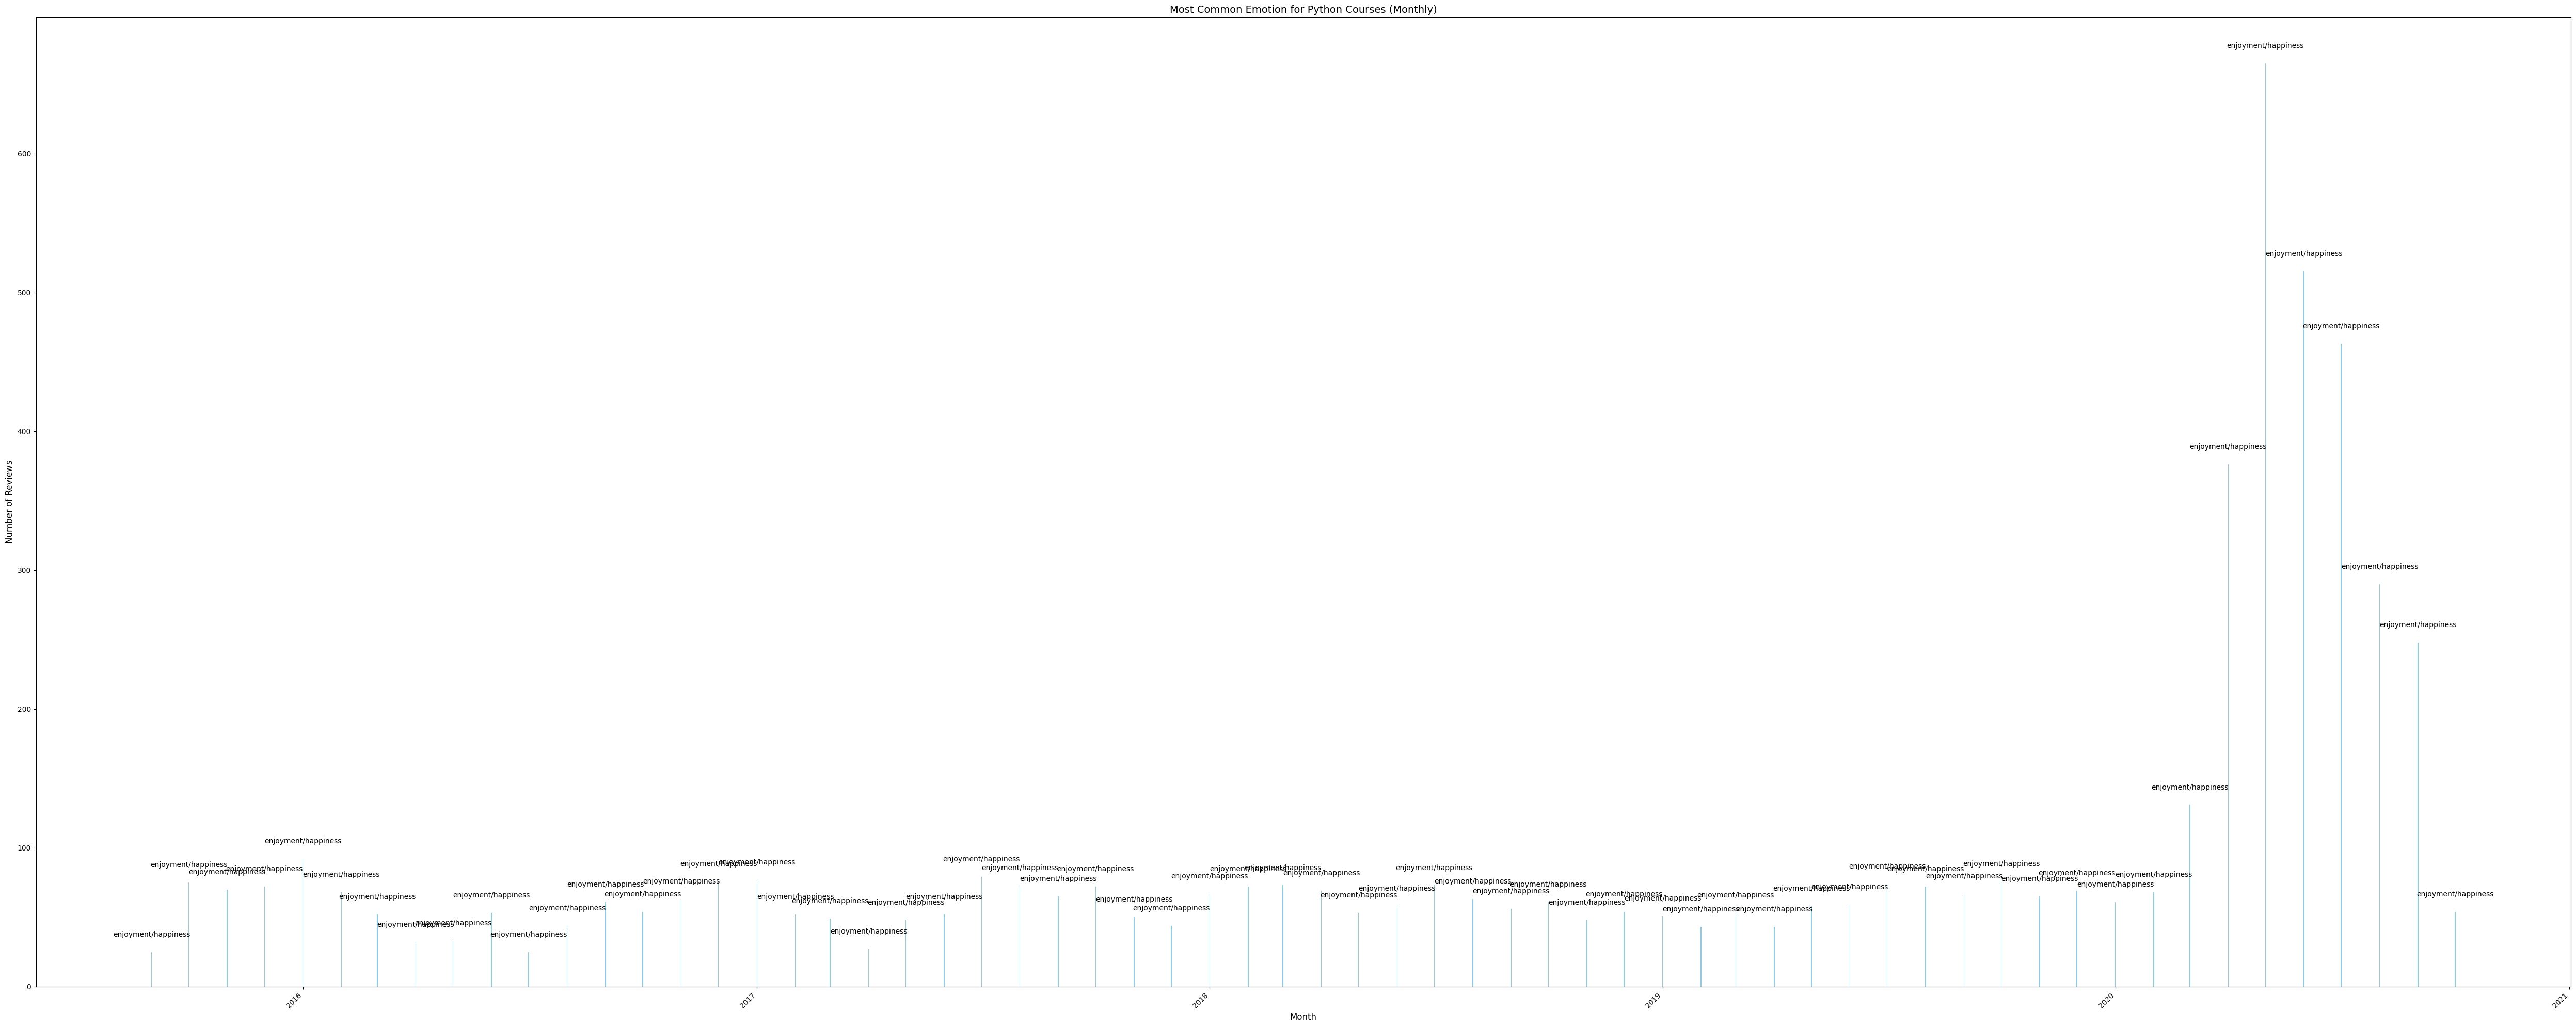


-- Python Module --
Select an option:
1. View the Outlook
2. View the Time Series Analysis
3. View the Topics
4. Exit
Enter your choice (1/2/3/4): 3

Select an option:
1. Course Material and Understanding
2. Utility and Usefulness
3. Instructor
4. Lectures
5. Learning Outcomes
6. Course Engagement and Course Feelings(Sentiment)
7. Course Material
8. Course Structure
9. Workload
10. Assignments
11. Grading
12. Exams
13. Exit
Enter your choice (1/12/13): 7
You selected: Course Material

Select an option for this topic:
1. View the Outlook
2. View the Time Series Analysis
3. Exit
Enter your choice (1/2/3): 1

    Outlook for Topic: "Course Material"
    -------------------------------

    Most reviews for the topic are "positive" and about "enjoyment/happiness".
    There has been no improvement in sentiment since 2020-09.
    The last improvement in emotion was in N/A.

    The most recent sentiment is "positive" and the most recent emotion is "enjoyment/happiness".
    
    Over the c

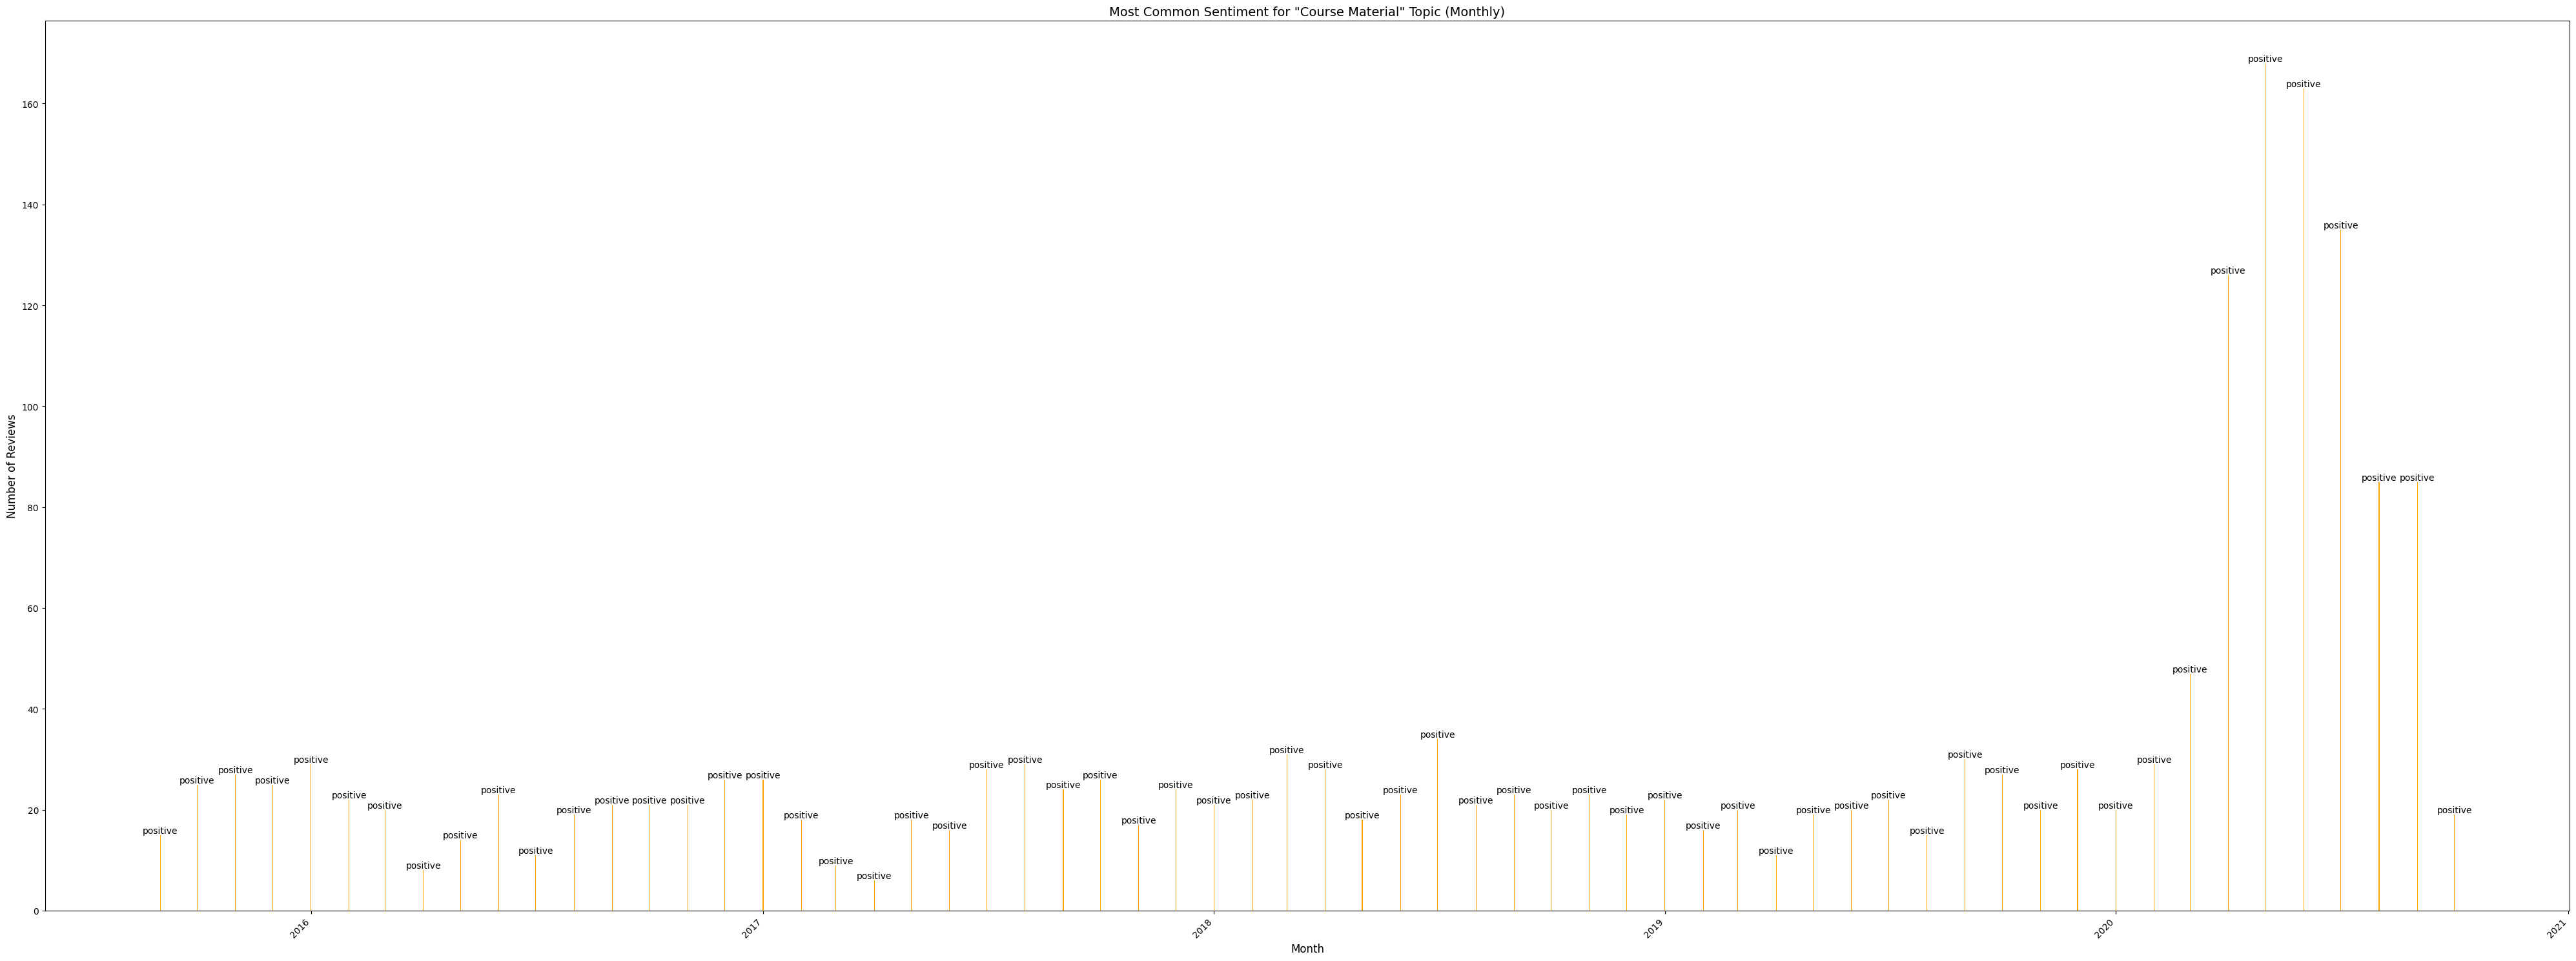


Select an option for this topic:
1. View the Outlook
2. View the Time Series Analysis
3. Exit
Enter your choice (1/2/3): 3

Select an option:
1. Course Material and Understanding
2. Utility and Usefulness
3. Instructor
4. Lectures
5. Learning Outcomes
6. Course Engagement and Course Feelings(Sentiment)
7. Course Material
8. Course Structure
9. Workload
10. Assignments
11. Grading
12. Exams
13. Exit
Enter your choice (1/12/13): 13

-- Python Module --
Select an option:
1. View the Outlook
2. View the Time Series Analysis
3. View the Topics
4. Exit
Enter your choice (1/2/3/4): 4
Exiting...


In [ ]:
main()